# 🛑 Fill in the following details

- Name and Surname of the team members: Diego De La Torre, Pablo Besteiro
- Group Number: 10
- Dataset name: Data_MLproject1.csv
- Date: 21-12-23
- Time spent on the project: plenty, approx.: 75 h
- Main difficulties encountered in the development: Communication

In [ ]:
#@title Load the csv and imports
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Classification algrthms' imports
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix, roc_auc_score
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import *
from sklearn.metrics import classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.datasets import load_digits
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture

# Regression imports
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.linear_model import TweedieRegressor, QuantileRegressor, SGDRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

# Clustering imports
from sklearn.cluster import *
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import seaborn as sns

# Leer el archivo CSV

#df = pd.read_csv('Data_MLproject1.csv', on_bad_lines = 'warn', low_memory= False)

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/Shareddrives/Machine Learning/Dataset/Data_MLproject1.csv')

df.head()

Mounted at /content/drive


<ipython-input-1-3185f34e4577>:70: DtypeWarning: Columns (11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/Shareddrives/Machine Learning/Dataset/Data_MLproject1.csv')


pl_name hostname  default_flag  sy_snum  sy_pnum  discoverymethod  \
0  11 Com b   11 Com             0        2        1  Radial Velocity   
1  11 Com b   11 Com             1        2        1  Radial Velocity   
2  11 UMi b   11 UMi             0        1        1  Radial Velocity   
3  11 UMi b   11 UMi             1        1        1  Radial Velocity   
4  11 UMi b   11 UMi             0        1        1  Radial Velocity   

   disc_year                           disc_facility              soltype  \
0       2007                        Xinglong Station  Published Confirmed   
1       2007                        Xinglong Station  Published Confirmed   
2       2009  Thueringer Landessternwarte Tautenburg  Published Confirmed   
3       2009  Thueringer Landessternwarte Tautenburg  Published Confirmed   
4       2009  Thueringer Landessternwarte Tautenburg  Published Confirmed   

   pl_controv_flag  ... sy_vmagerr2     sy_kmag sy_kmagerr1 sy_kmagerr2  \
0                0  ...   -230000.0  22820000.0   3460000.0  -3460000.0   
1                0  ...   -230000.0  22820000.0   3460000.0  -3460000.0   
2                0  ...    -50000.0  19390000.0   2700000.0  -2700000.0   
3                0  ...    -50000.0  19390000.0   2700000.0  -2700000.0   
4                0  ...    -50000.0  19390000.0   2700000.0  -2700000.0   

   sy_gaiamag  sy_gaiamagerr1  sy_gaiamagerr2   rowupdate  pl_pubdate  \
0  44403800.0         38479.0        -38479.0  23/07/2014     2011-08   
1  44403800.0         38479.0        -38479.0  14/05/2014     2008-01   
2  45621600.0         39035.0        -39035.0  25/04/2018     2011-08   
3  45621600.0         39035.0        -39035.0  04/09/2018     2017-03   
4  45621600.0         39035.0        -39035.0  25/04/2018     2009-10   

   releasedate  
0   23/07/2014  
1   14/05/2014  
2   23/07/2014  
3   06/09/2018  
4   14/05/2014  

[5 rows x 92 columns]



---



# 🛑 Data Cleaning

Analyse the data in you dataset, provide a statistichal analysis, visualizations...

Clean and prepare the data, use the different methods seen in class.

## 1st Block
1. Remove empty columns/rows
2. Discard unecessary columns/rows + handle mean error
3. Handle missing values and duplicates
4. Noisy data analysis

In [ ]:
#@title Pre-analysis of data attributes
# To start with the data cleaning, after loading the csv, we are going to search for empty data. Starting with columns and then with rows

#Empty columns?
#In the list empty_columns we store the names of the columns that have missing values

empty_columns = df.columns[df.isnull().all()]

if len(empty_columns) == 0:
  print("There are no empty columns")
else:
  print("Empty columns: ", empty_columns)

#Empty rows?
#NAs with the columns, we store the rows at has at least one empty value

#empty_rows = df[df.isnull().any(axis = 1)]
empty_rows = [row for row in df if all(cell == "" for cell in row)]

if len(empty_rows)==0:
  print("There are no empty rows")
else:
  print("Number of empty rows: ", len(empty_rows))

print(f'Total num of cols: ',len(df.columns)) # Num of columns initially
print(f'Total num of rows: ',len(df)) # Total num of rows

There are no empty columns
There are no empty rows
Total num of cols:  92
Total num of rows:  35030


### Column selection and mean error handling

In [ ]:
# Before starting to work on the missing values, we are going to search for unnecessary columns
#There are columns that are not interesting for us, or some that show the same value in different metrics

#We are going to start removing the columns number 11 and 23, as they are links for studies and articles related to the discovery of the planet and it doesn't
#provide any useful information despite the understanment of the data

df = df.drop(columns = ['pl_refname', 'st_refname', 'sy_refname'])

#We also have some redundant columns we are going to simplify

#The columns 14 and 15, both mesure the radious of the planet, but the column 14 uses Earth's radius as unit and column 15 uses Jupiter's radious
#as unit. We think that, as we are trying to find KOI planets, the column 14 is more useful and the other one is just redundant

df = df.drop(columns = ['pl_radj','pl_radjerr1','pl_radjerr2','pl_radjlim'])

#We have the same situation with the columns 16 and 17, instead of radious, mass

df = df.drop(columns = ['pl_bmassj','pl_bmassjerr1','pl_bmassjerr2','pl_bmassjlim'])

#print(df.columns)
print(len(df.columns)) # -11 rows


81


In [ ]:
#We can see that the values that in the website aren't 'normal' ints and have aproximations have been split in several columns in the csv
#Our objetive is to sumarize them into only one column

#The first column that has been split is Orbital Period [days]. If we see the website we can see that for example, in the second row
#the orbital period of 326.03 days is shown in the csv as 32603000000. First we will change this. Then we will calculate the mean of the next
#columns and add it to the 'principal' column, as in the web the vaues have and additional +/- values. Additionaly the column
#pl_orbperlim doesn't have any value stored so we are going to eliminate it

df['pl_orbper'] = pd.to_numeric(df['pl_orbper'], errors = 'coerce')
df['pl_orbper'] = df['pl_orbper'].fillna(0).astype(float)
df['pl_orbper'] = df['pl_orbper'] / 10**8

df['pl_orbpererr1'] = pd.to_numeric(df['pl_orbpererr1'], errors = 'coerce')
df['pl_orbpererr1'] = df['pl_orbpererr1'].fillna(0).astype(float)
df['pl_orbpererr1'] = df['pl_orbpererr1'] / 10**8

df['pl_orbpererr2'] = pd.to_numeric(df['pl_orbpererr2'], errors = 'coerce')
df['pl_orbpererr2'] = df['pl_orbpererr2'].fillna(0).astype(float)
df['pl_orbpererr2'] = df['pl_orbpererr2'] / 10**8

df['media1'] = df[['pl_orbpererr1', 'pl_orbpererr2']].mean(axis=1)
df['pl_orbper'] = df['pl_orbper'] + df['media1']

df = df.drop(columns = ['pl_orbpererr1'])
df = df.drop(columns = ['pl_orbpererr2'])
df = df.drop(columns = ['pl_orbperlim'])
df = df.drop(columns = ['media1'])

#print(df.columns)
print(len(df.columns))

78


In [ ]:
# We are going to do the same with the next column pl_orbsmax

df['pl_orbsmax'] = pd.to_numeric(df['pl_orbsmax'], errors = 'coerce')
df['pl_orbsmax'] = df['pl_orbsmax'].fillna(0).astype(float)
df['pl_orbsmax'] = df['pl_orbsmax'] / 10**6

df['pl_orbsmaxerr1'] = pd.to_numeric(df['pl_orbsmaxerr1'], errors = 'coerce')
df['pl_orbsmaxerr1'] = df['pl_orbsmaxerr1'].fillna(0).astype(float)
df['pl_orbsmaxerr1'] = df['pl_orbsmaxerr1'] / 10**6

df['pl_orbsmaxerr2'] = pd.to_numeric(df['pl_orbsmaxerr2'], errors = 'coerce')
df['pl_orbsmaxerr2'] = df['pl_orbsmaxerr2'].fillna(0).astype(float)
df['pl_orbsmaxerr2'] = df['pl_orbsmaxerr2'] / 10**6

df['media2'] = df[['pl_orbsmaxerr1', 'pl_orbsmaxerr2']].mean(axis=1)
df['pl_orbsmax'] = df['pl_orbsmax'] + df['media2']

df = df.drop(columns = ['pl_orbsmaxerr1'])
df = df.drop(columns = ['pl_orbsmaxerr2'])
df = df.drop(columns = ['pl_orbsmaxlim'])
df = df.drop(columns = ['media2'])

#print(df.columns)
print(len(df.columns))


75


In [ ]:
#We are going to do the same with the next column pl_rade

df['pl_rade'] = pd.to_numeric(df['pl_rade'], errors = 'coerce')
df['pl_rade'] = df['pl_rade'].fillna(0).astype(float)
df['pl_rade'] = df['pl_rade'] / 10**6

df['pl_radeerr1'] = pd.to_numeric(df['pl_radeerr1'], errors = 'coerce')
df['pl_radeerr1'] = df['pl_radeerr1'].fillna(0).astype(float)
df['pl_radeerr1'] = df['pl_radeerr1'] / 10**6

df['pl_radeerr2'] = pd.to_numeric(df['pl_radeerr2'], errors = 'coerce')
df['pl_radeerr2'] = df['pl_radeerr2'].fillna(0).astype(float)
df['pl_radeerr2'] = df['pl_radeerr2'] / 10**6

df['media3'] = df[['pl_radeerr1', 'pl_radeerr2']].mean(axis=1)
df['pl_rade'] = df['pl_rade'] + df['media3']

df = df.drop(columns = ['pl_radeerr1'])
df = df.drop(columns = ['pl_radeerr2'])
df = df.drop(columns = ['pl_radelim'])
df = df.drop(columns = ['media3'])

#print(df.columns)
print(len(df.columns))

72


In [ ]:
#We are going to do the same with the next column pl_bmasse

df['pl_bmasse'] = pd.to_numeric(df['pl_bmasse'], errors = 'coerce')
df['pl_bmasse'] = df['pl_bmasse'].fillna(0).astype(float)
df['pl_bmasse'] = df['pl_bmasse'] / 10**5

df['pl_bmasseerr1'] = pd.to_numeric(df['pl_bmasseerr1'], errors = 'coerce')
df['pl_bmasseerr1'] = df['pl_bmasseerr1'].fillna(0).astype(float)
df['pl_bmasseerr1'] = df['pl_bmasseerr1'] / 10**5

df['pl_bmasseerr2'] = pd.to_numeric(df['pl_bmasseerr2'], errors = 'coerce')
df['pl_bmasseerr2'] = df['pl_bmasseerr2'].fillna(0).astype(float)
df['pl_bmasseerr2'] = df['pl_bmasseerr2'] / 10**5

df['media4'] = df[['pl_bmasseerr1', 'pl_bmasseerr2']].mean(axis=1)
df['pl_bmasse'] = df['pl_bmasse'] + df['media4']

df = df.drop(columns = ['pl_bmasseerr1'])
df = df.drop(columns = ['pl_bmasseerr2'])
df = df.drop(columns = ['pl_bmasselim'])
df = df.drop(columns = ['media4'])

#print(df.columns)
print(len(df.columns))

69


In [ ]:
#We are going to do the same with the next column pl_orbeccen

df['pl_orbeccen'] = pd.to_numeric(df['pl_orbeccen'], errors = 'coerce')
df['pl_orbeccen'] = df['pl_orbeccen'].fillna(0).astype(float)
df['pl_orbeccen'] = df['pl_orbeccen'] / 10**6

df['pl_orbeccenerr1'] = pd.to_numeric(df['pl_orbeccenerr1'], errors = 'coerce')
df['pl_orbeccenerr1'] = df['pl_orbeccenerr1'].fillna(0).astype(float)
df['pl_orbeccenerr1'] = df['pl_orbeccenerr1'] / 10**6

df['pl_orbeccenerr2'] = pd.to_numeric(df['pl_orbeccenerr2'], errors = 'coerce')
df['pl_orbeccenerr2'] = df['pl_orbeccenerr2'].fillna(0).astype(float)
df['pl_orbeccenerr2'] = df['pl_orbeccenerr2'] / 10**6

df['media5'] = df[['pl_orbeccenerr1', 'pl_orbeccenerr2']].mean(axis=1)
df['pl_orbeccen'] = df['pl_orbeccen'] + df['media5']

df = df.drop(columns = ['pl_orbeccenerr1'])
df = df.drop(columns = ['pl_orbeccenerr2'])
df = df.drop(columns = ['pl_orbeccenlim'])
df = df.drop(columns = ['media5'])

#print(df.columns)
print(len(df.columns))

66


In [ ]:
#We are going to do the same with the next column pl_insol

df['pl_insol'] = pd.to_numeric(df['pl_insol'], errors = 'coerce')
df['pl_insol'] = df['pl_insol'].fillna(0).astype(float)
df['pl_insol'] = df['pl_insol'] / 10**2

df['pl_insolerr1'] = pd.to_numeric(df['pl_insolerr1'], errors = 'coerce')
df['pl_insolerr1'] = df['pl_insolerr1'].fillna(0).astype(float)
df['pl_insolerr1'] = df['pl_insolerr1'] / 10**2

df['pl_insolerr2'] = pd.to_numeric(df['pl_insolerr2'], errors = 'coerce')
df['pl_insolerr2'] = df['pl_insolerr2'].fillna(0).astype(float)
df['pl_insolerr2'] = df['pl_insolerr2'] / 10**2

df['media6'] = df[['pl_insolerr1', 'pl_insolerr2']].mean(axis=1)
df['pl_orbeccen'] = df['pl_orbeccen'] + df['media6']

df = df.drop(columns = ['pl_insolerr1'])
df = df.drop(columns = ['pl_insolerr2'])
df = df.drop(columns = ['pl_insollim'])
df = df.drop(columns = ['media6'])

#print(df.columns)
print(len(df.columns))

63


In [ ]:
#We are going to do the same with the next column pl_eqt

df['pl_eqt'] = pd.to_numeric(df['pl_eqt'], errors = 'coerce')
df['pl_eqt'] = df['pl_eqt'].fillna(0).astype(float)

df['pl_eqterr1'] = pd.to_numeric(df['pl_eqterr1'], errors = 'coerce')
df['pl_eqterr1'] = df['pl_eqterr1'].fillna(0).astype(float)

df['pl_eqterr2'] = pd.to_numeric(df['pl_eqterr2'], errors = 'coerce')
df['pl_eqterr2'] = df['pl_eqterr2'].fillna(0).astype(float)

df['media7'] = df[['pl_eqterr1', 'pl_eqterr2']].mean(axis=1)
df['pl_eqt'] = df['pl_eqt'] + df['media7']

df = df.drop(columns = ['pl_eqterr1'])
df = df.drop(columns = ['pl_eqterr2'])
df = df.drop(columns = ['pl_eqtlim'])
df = df.drop(columns = ['media7'])

#print(df.columns)
print(len(df.columns))

60


In [ ]:
#We are going to do the same with the next column st_teff

df['st_teff'] = pd.to_numeric(df['st_teff'], errors = 'coerce')
df['st_teff'] = df['st_teff'].fillna(0).astype(float)

df['st_tefferr1'] = pd.to_numeric(df['st_tefferr1'], errors = 'coerce')
df['st_tefferr1'] = df['st_tefferr1'].fillna(0).astype(float)

df['st_tefferr2'] = pd.to_numeric(df['st_tefferr2'], errors = 'coerce')
df['st_tefferr2'] = df['st_tefferr2'].fillna(0).astype(float)

df['media8'] = df[['st_tefferr1', 'st_tefferr2']].mean(axis=1)
df['st_teff'] = df['st_teff'] + df['media8']

df = df.drop(columns = ['st_tefferr1'])
df = df.drop(columns = ['st_tefferr2'])
df = df.drop(columns = ['st_tefflim'])
df = df.drop(columns = ['media8'])

#print(df.columns)
print(len(df.columns))

57


In [ ]:
#We are going to do the same with the next column st_rad

df['st_rad'] = pd.to_numeric(df['st_rad'], errors = 'coerce')
df['st_rad'] = df['st_rad'].fillna(0).astype(float)
df['st_rad'] = df['st_rad'] / 10**2

df['st_raderr1'] = pd.to_numeric(df['st_raderr1'], errors = 'coerce')
df['st_raderr1'] = df['st_raderr1'].fillna(0).astype(float)
df['st_raderr1'] = df['st_raderr1'] / 10**2

df['st_raderr2'] = pd.to_numeric(df['st_raderr2'], errors = 'coerce')
df['st_raderr2'] = df['st_raderr2'].fillna(0).astype(float)
df['st_raderr2'] = df['st_raderr2'] / 10**2

df['media9'] = df[['st_raderr1', 'st_raderr2']].mean(axis=1)
df['st_rad'] = df['st_rad'] + df['media9']

df = df.drop(columns = ['st_raderr1'])
df = df.drop(columns = ['st_raderr2'])
df = df.drop(columns = ['st_radlim'])
df = df.drop(columns = ['media9'])

#print(df.columns)
print(len(df.columns))

54


In [ ]:
#We are going to do the same with the next column st_mass

df['st_mass'] = pd.to_numeric(df['st_mass'], errors = 'coerce')
df['st_mass'] = df['st_mass'].fillna(0).astype(float)
df['st_mass'] = df['st_mass'] / 10**2

df['st_masserr1'] = pd.to_numeric(df['st_masserr1'], errors = 'coerce')
df['st_masserr1'] = df['st_masserr1'].fillna(0).astype(float)
df['st_masserr1'] = df['st_masserr1'] / 10**2

df['st_masserr2'] = pd.to_numeric(df['st_masserr2'], errors = 'coerce')
df['st_masserr2'] = df['st_masserr2'].fillna(0).astype(float)
df['st_masserr2'] = df['st_masserr2'] / 10**2

df['media10'] = df[['st_masserr1', 'st_masserr2']].mean(axis=1)
df['st_rad'] = df['st_rad'] + df['media10']

df = df.drop(columns = ['st_masserr1'])
df = df.drop(columns = ['st_masserr2'])
df = df.drop(columns = ['st_masslim'])
df = df.drop(columns = ['media10'])

#print(df.columns)
print(len(df.columns))

51


In [ ]:
#We are going to do the same with the next column st_met

df['st_met'] = pd.to_numeric(df['st_met'], errors = 'coerce')
df['st_met'] = df['st_met'].fillna(0).astype(float)
df['st_met'] = df['st_met'] / 10**3

df['st_meterr1'] = pd.to_numeric(df['st_meterr1'], errors = 'coerce')
df['st_meterr1'] = df['st_meterr1'].fillna(0).astype(float)
df['st_meterr1'] = df['st_meterr1'] / 10**3

df['st_meterr2'] = pd.to_numeric(df['st_meterr2'], errors = 'coerce')
df['st_meterr2'] = df['st_meterr2'].fillna(0).astype(float)
df['st_meterr2'] = df['st_meterr2'] / 10**3

df['media11'] = df[['st_meterr1', 'st_meterr2']].mean(axis=1)
df['st_rad'] = df['st_rad'] + df['media11']

df = df.drop(columns = ['st_meterr1'])
df = df.drop(columns = ['st_meterr2'])
df = df.drop(columns = ['st_metlim'])
df = df.drop(columns = ['media11'])

#print(df.columns)
print(len(df.columns))

48


In [ ]:
#We are going to do the same with the next column st_logg

df['st_logg'] = pd.to_numeric(df['st_logg'], errors = 'coerce')
df['st_logg'] = df['st_logg'].fillna(0).astype(float)
df['st_logg'] = df['st_logg'] / 10**2

df['st_loggerr1'] = pd.to_numeric(df['st_loggerr1'], errors = 'coerce')
df['st_loggerr1'] = df['st_loggerr1'].fillna(0).astype(float)
df['st_loggerr1'] = df['st_loggerr1'] / 10**2

df['st_loggerr2'] = pd.to_numeric(df['st_loggerr2'], errors = 'coerce')
df['st_loggerr2'] = df['st_loggerr2'].fillna(0).astype(float)
df['st_loggerr2'] = df['st_loggerr2'] / 10**2

df['media12'] = df[['st_loggerr1', 'st_loggerr2']].mean(axis=1)
df['st_logg'] = df['st_logg'] + df['media12']

df = df.drop(columns = ['st_loggerr1'])
df = df.drop(columns = ['st_loggerr2'])
df = df.drop(columns = ['st_logglim'])
df = df.drop(columns = ['media12'])

df = df.drop(columns = ['ra','dec'])

#print(df.columns)
print(len(df.columns))

43


In [ ]:
#We are going to do the same with the next column sy_dist

df['sy_dist'] = pd.to_numeric(df['sy_dist'], errors = 'coerce')
df['sy_dist'] = df['sy_dist'].fillna(0).astype(float)
df['sy_dist'] = df['sy_dist'] / 10**7

df['sy_disterr1'] = pd.to_numeric(df['sy_disterr1'], errors = 'coerce')
df['sy_disterr1'] = df['sy_disterr1'].fillna(0).astype(float)
df['sy_disterr1'] = df['sy_disterr1'] / 10**7

df['sy_disterr2'] = pd.to_numeric(df['sy_disterr2'], errors = 'coerce')
df['sy_disterr2'] = df['sy_disterr2'].fillna(0).astype(float)
df['sy_disterr2'] = df['sy_disterr2'] / 10**7

df['media13'] = df[['sy_disterr1', 'sy_disterr2']].mean(axis=1)
df['sy_dist'] = df['sy_dist'] + df['media13']

df = df.drop(columns = ['sy_disterr1'])
df = df.drop(columns = ['sy_disterr2'])
df = df.drop(columns = ['media13'])

#print(df.columns)
print(len(df.columns))

41


In [ ]:
#We are going to do the same with the next column sy_vmag

df['sy_vmag'] = pd.to_numeric(df['sy_vmag'], errors = 'coerce')
df['sy_vmag'] = df['sy_vmag'].fillna(0).astype(float)
df['sy_vmag'] = df['sy_vmag'] / 10**7

df['sy_vmagerr1'] = pd.to_numeric(df['sy_vmagerr1'], errors = 'coerce')
df['sy_vmagerr1'] = df['sy_vmagerr1'].fillna(0).astype(float)
df['sy_vmagerr1'] = df['sy_vmagerr1'] / 10**7

df['sy_vmagerr2'] = pd.to_numeric(df['sy_vmagerr2'], errors = 'coerce')
df['sy_vmagerr2'] = df['sy_vmagerr2'].fillna(0).astype(float)
df['sy_vmagerr2'] = df['sy_vmagerr2'] / 10**7

df['media14'] = df[['sy_vmagerr1', 'sy_vmagerr2']].mean(axis=1)
df['sy_vmag'] = df['sy_vmag'] + df['media14']

df = df.drop(columns = ['sy_vmagerr1'])
df = df.drop(columns = ['sy_vmagerr2'])
df = df.drop(columns = ['media14'])

#print(df.columns)
print(len(df.columns))

39


In [ ]:
#We are going to do the same with the next column sy_kmag

df['sy_kmag'] = pd.to_numeric(df['sy_kmag'], errors = 'coerce')
df['sy_kmag'] = df['sy_kmag'].fillna(0).astype(float)
df['sy_kmag'] = df['sy_kmag'] / 10**7

df['sy_kmagerr1'] = pd.to_numeric(df['sy_kmagerr1'], errors = 'coerce')
df['sy_kmagerr1'] = df['sy_kmagerr1'].fillna(0).astype(float)
df['sy_kmagerr1'] = df['sy_kmagerr1'] / 10**7

df['sy_kmagerr2'] = pd.to_numeric(df['sy_kmagerr2'], errors = 'coerce')
df['sy_kmagerr2'] = df['sy_kmagerr2'].fillna(0).astype(float)
df['sy_kmagerr2'] = df['sy_kmagerr2'] / 10**7

df['media15'] = df[['sy_kmagerr1', 'sy_kmagerr2']].mean(axis=1)
df['sy_kmag'] = df['sy_kmag'] + df['media15']

df = df.drop(columns = ['sy_kmagerr1'])
df = df.drop(columns = ['sy_kmagerr2'])
df = df.drop(columns = ['media15'])

#print(df.columns)
print(len(df.columns))

37


In [ ]:
#We are going to do the same with the next column sy_gaiamag

df['sy_gaiamag'] = pd.to_numeric(df['sy_gaiamag'], errors = 'coerce')
df['sy_gaiamag'] = df['sy_gaiamag'].fillna(0).astype(float)
df['sy_gaiamag'] = df['sy_gaiamag'] / 10**7

df['sy_gaiamagerr1'] = pd.to_numeric(df['sy_gaiamagerr1'], errors = 'coerce')
df['sy_gaiamagerr1'] = df['sy_gaiamagerr1'].fillna(0).astype(float)
df['sy_gaiamagerr1'] = df['sy_gaiamagerr1'] / 10**7

df['sy_gaiamagerr2'] = pd.to_numeric(df['sy_gaiamagerr2'], errors = 'coerce')
df['sy_gaiamagerr2'] = df['sy_gaiamagerr2'].fillna(0).astype(float)
df['sy_gaiamagerr2'] = df['sy_gaiamagerr2'] / 10**7

df['media16'] = df[['sy_gaiamagerr1', 'sy_gaiamagerr2']].mean(axis=1)
df['sy_gaiamag'] = df['sy_gaiamag'] + df['media16']

df = df.drop(columns = ['sy_gaiamagerr1'])
df = df.drop(columns = ['sy_gaiamagerr2'])
df = df.drop(columns = ['media16'])

#print(df.columns)
print(len(df.columns))

35


In [ ]:
print(df.columns)

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_bmasse',
       'pl_bmassprov', 'pl_orbeccen', 'pl_insol', 'pl_eqt', 'ttv_flag',
       'st_spectype', 'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_metratio',
       'st_logg', 'rastr', 'decstr', 'sy_dist', 'sy_vmag', 'sy_kmag',
       'sy_gaiamag', 'rowupdate', 'pl_pubdate', 'releasedate'],
      dtype='object')


### Missing values and duplicates

In [ ]:
# Missing Values
# We will create two subdataframes, the df_ESI (ESI stands for Earth Similarity Index) and it will allow us to rate habitability in a 0 to 1 ratio.
# Secondly we will build the df_DrakeDT which will handle missing values differently and will add a boolean attribute to the entries
# according to wether its suitable for life hosting study or not.

df = df.dropna(subset=['pl_insol', 'pl_rade','pl_eqt','st_mass'])

print('Null sum per attribute:')
df.isnull().sum()

# Provided that we won't be using these data columns since they don't provide any meaningful information
# for our purpose; pl_bmassprov, st_spectype and st_metratio.
# As well, we will remove the rowupdate variable's NA entry row as there's only one

df = df.drop(columns = ['pl_bmassprov','st_spectype','st_metratio'])
df = df.dropna(subset = ['rowupdate'])

print('Null sum per attribute:')
df.isnull().sum()

Null sum per attribute:
Null sum per attribute:


pl_name            0
hostname           0
default_flag       0
sy_snum            0
sy_pnum            0
discoverymethod    0
disc_year          0
disc_facility      0
soltype            0
pl_controv_flag    0
pl_orbper          0
pl_orbsmax         0
pl_rade            0
pl_bmasse          0
pl_orbeccen        0
pl_insol           0
pl_eqt             0
ttv_flag           0
st_teff            0
st_rad             0
st_mass            0
st_met             0
st_logg            0
rastr              0
decstr             0
sy_dist            0
sy_vmag            0
sy_kmag            0
sy_gaiamag         0
rowupdate          0
pl_pubdate         0
releasedate        0
dtype: int64

In [ ]:
# We will be dropping duplicates with pandas function drop_duplicates()
df = df.drop_duplicates()

#We have seen that there are planets that appear more than one times. These is because astronomist discover new information
#about them with the developing technology they get access to. We are going to stay with the latest data of each planet and
#remove the old one.

df.sort_values(by = 'rowupdate', ascending = False)
df.drop_duplicates(subset='pl_name', keep='first', inplace=True)
df.reset_index(drop=True)

print(df.shape[0])
df.head(10)

5514


pl_name               hostname  default_flag  sy_snum  \
0                  11 Com b                 11 Com             0        2   
2                  11 UMi b                 11 UMi             0        1   
5                  14 And b                 14 And             0        1   
7                  14 Her b                 14 Her             1        1   
15               16 Cyg B b               16 Cyg B             0        3   
21                 17 Sco b                 17 Sco             1        1   
22                 18 Del b                 18 Del             0        2   
24  1RXS J160929.1-210524 b  1RXS J160929.1-210524             1        1   
28                 24 Boo b                 24 Boo             1        1   
29                 24 Sex b                 24 Sex             1        1   

    sy_pnum  discoverymethod  disc_year  \
0         1  Radial Velocity       2007   
2         1  Radial Velocity       2009   
5         1  Radial Velocity       2008   
7         2  Radial Velocity       2002   
15        1  Radial Velocity       1996   
21        1  Radial Velocity       2020   
22        1  Radial Velocity       2008   
24        1          Imaging       2008   
28        1  Radial Velocity       2018   
29        2  Radial Velocity       2010   

                             disc_facility              soltype  \
0                         Xinglong Station  Published Confirmed   
2   Thueringer Landessternwarte Tautenburg  Published Confirmed   
5        Okayama Astrophysical Observatory  Published Confirmed   
7                   W. M. Keck Observatory  Published Confirmed   
15                  Multiple Observatories  Published Confirmed   
21                        Lick Observatory  Published Confirmed   
22       Okayama Astrophysical Observatory  Published Confirmed   
24                      Gemini Observatory  Published Confirmed   
28       Okayama Astrophysical Observatory  Published Confirmed   
29                        Lick Observatory  Published Confirmed   

    pl_controv_flag  ...  st_logg         rastr         decstr    sy_dist  \
0                 0  ...     0.00  12h20m42.91s  +17d47m35.71s   93.18460   
2                 0  ...     0.00  15h17m05.90s  +71d49m26.19s  125.32100   
5                 0  ...     0.00  23h31m17.80s  +39d14m09.01s   75.43920   
7                 0  ...     0.00  16h10m24.50s  +43d48m58.90s   17.93230   
15                0  ...     4.35  19h41m51.75s  +50d31m00.57s   21.13965   
21                0  ...     1.69  16h13m50.90s  -11d50m16.05s  124.95300   
22                0  ...     0.00  20h58m25.88s  +10d50m20.90s   76.22200   
24                0  ...     0.00  16h09m30.30s  -21d04m59.31s  139.14750   
28                0  ...     2.42  14h28m37.33s  +49d50m40.74s   95.98630   
29                0  ...     3.50  10h23m28.44s  -00d54m08.64s   72.07540   

     sy_vmag  sy_kmag  sy_gaiamag   rowupdate  pl_pubdate  releasedate  
0    4.72307    2.282     4.44038  23/07/2014     2011-08   23/07/2014  
2    5.01300    1.939     4.56216  25/04/2018     2011-08   23/07/2014  
5    5.23133    2.331     4.91781  23/07/2014     2011-08   23/07/2014  
7    6.61935    4.714     6.38300  12/06/2023     2022-09   12/06/2023  
15   6.21500    4.651     6.06428  25/04/2018     1997-07   21/08/2014  
21   5.22606    2.094     4.75429  25/10/2021     2020-12   25/10/2021  
22   5.51048    3.366     5.27476  23/07/2014     2011-08   23/07/2014  
24  12.61800    8.916    12.05720  01/04/2015     2015-03   01/04/2015  
28   5.59000    3.159     5.33390  25/04/2018     2018-08   26/04/2018  
29   6.45350    4.285     6.20374  14/05/2014     2011-01   14/05/2014  

[10 rows x 32 columns]

### Noisy data analysis

In [ ]:
#We are going to make the boxplot of our most relevant columns

columns_boxplots = ['pl_rade','st_mass','pl_eqt','pl_insol']
df_bp = df[columns_boxplots]

<ipython-input-24-ab2857ccbe37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bp['pl_rade']=df_bp['pl_rade'].replace(to_replace=0,value=np.nan)


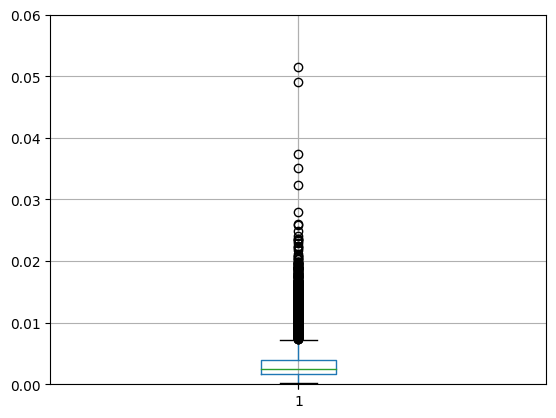

count    3291.000000
mean        0.006522
std         0.080869
min         0.000270
25%         0.001638
50%         0.002460
75%         0.003902
max         3.634625
Name: pl_rade, dtype: float64

In [ ]:
#df.boxplot(column='pl_rade')

df_bp['pl_rade']=df_bp['pl_rade'].replace(to_replace=0,value=np.nan)
df_bp.boxplot(column="pl_rade")
#it doesnt have sense to have planets with 0 radium
plt.boxplot(df_bp['pl_rade'])
y_limit = 0.06  #el valor límite que consideramos como grande
plt.ylim(0, y_limit)
plt.show()

df_bp['pl_rade'].describe()

<ipython-input-25-bf6f924376cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bp['st_mass']=df_bp['st_mass'].replace(to_replace=0,value=np.nan)


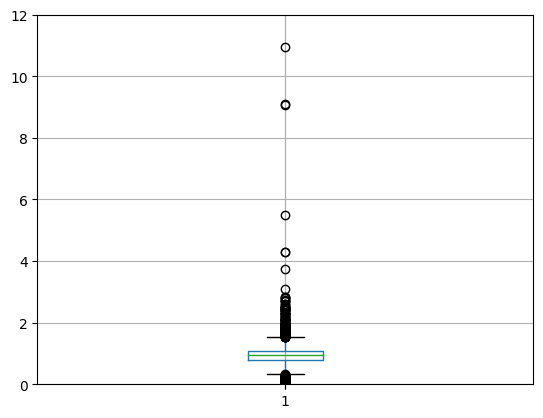

count    4637.000000
mean        0.945799
std         0.413551
min         0.010000
25%         0.780000
50%         0.950000
75%         1.080000
max        10.940000
Name: st_mass, dtype: float64

In [ ]:
#df.boxplot(column='st_mass')

df_bp['st_mass']=df_bp['st_mass'].replace(to_replace=0,value=np.nan)
df_bp.boxplot(column="st_mass")
# it doesnt make sense to have star with 0 mass
plt.boxplot(df_bp['st_mass'])
y_limit = 12  #el valor límite que consideramos como grande
plt.ylim(0, y_limit)
plt.show()
df_bp['st_mass'].describe()

<ipython-input-26-bcd7c5c383ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bp['pl_eqt']=df_bp['pl_eqt'].replace(to_replace=0,value=np.nan)


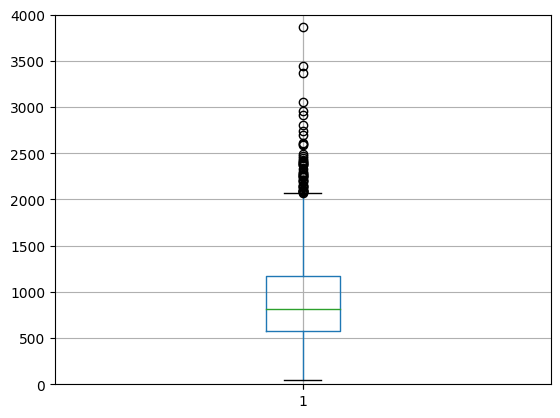

count    2287.000000
mean      914.038041
std       463.564992
min        50.000000
25%       576.000000
50%       819.000000
75%      1174.000000
max      3866.000000
Name: pl_eqt, dtype: float64

In [ ]:
#df.boxplot(column='pl_eqt')

df_bp['pl_eqt']=df_bp['pl_eqt'].replace(to_replace=0,value=np.nan)
df_bp.boxplot(column="pl_eqt")
#it doesnt make sense to have planets with 0 radium
plt.boxplot(df_bp['pl_eqt'])
y_limit = 4000  #el valor límite que consideramos como grande
plt.ylim(0, y_limit)
plt.show()

df_bp['pl_eqt'].describe()

<ipython-input-27-337ebe2bf999>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bp['pl_insol']=df_bp['pl_insol'].replace(to_replace=0,value=np.nan)


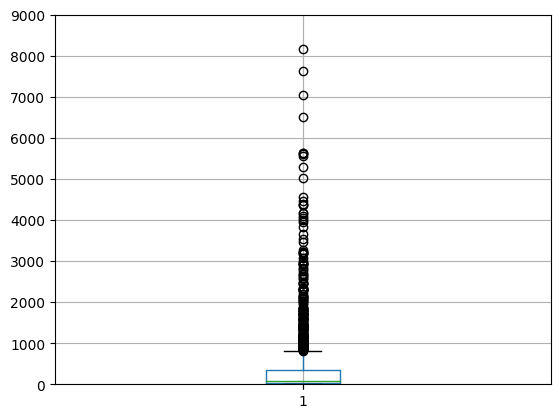

count     1946.000000
mean       397.153571
std       1207.984440
min          0.020000
25%         20.390000
50%         88.865000
75%        340.832500
max      33326.730000
Name: pl_insol, dtype: float64

In [ ]:
#df.boxplot(column='pl_insol')

df_bp['pl_insol']=df_bp['pl_insol'].replace(to_replace=0,value=np.nan)
df_bp.boxplot(column="pl_insol")
#it doesnt have sense to have planets with 0 radium
plt.boxplot(df_bp['pl_insol'])
y_limit = 9000  #el valor límite que consideramos como grande
plt.ylim(0, y_limit)
plt.show()

df_bp['pl_insol'].describe()

## 2nd Block
1. Distribution of the outcome
2. Data normalization
3. Feature engineering and multicolinearity handling

### Distribution of the outcome

Habitable planets:  0


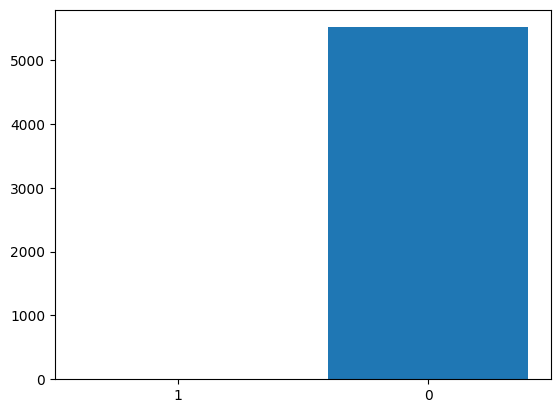

In [ ]:
#In order to make this graph that will represet the distribution of the outcome we need to create a new columm that will give us the information if the planet
#is able to host life. The parameters that we need to know if we can habitate the planet are: the mass of the host star compared to the mass of the sun, equilibriim temperature, eccentricity,
#and planetary radius. The values that have to be between are pr[0.6-3], t[250-350], e[0-0.6]m=[0.6-3]
#So now i will make a function to achieve this goal.
#The columns that we are gonna use are st_mass, pl_eqt, pl_rade, pl_insol
def is_habitable(fila):
  if (fila['pl_eqt']>=223 and fila['pl_eqt']<= 340 and fila['pl_rade']>= 1700 and fila['pl_rade']<=6000 and fila['pl_insol']>= 0 and fila['pl_insol']<=160 and fila['st_mass']>= 1 and fila['st_mass']<=53):
    return 1
  else:
    return 0
df['is_habitable'] = df.apply(is_habitable, axis = 1)

distribution_outcome_0 = df['is_habitable'].value_counts()[0]#esto es para la distribucion
distribution_outcome_1 = len(df['is_habitable'])- distribution_outcome_0
plt.bar(['1','0'], [distribution_outcome_1, distribution_outcome_0])

#The reason of this graph is that there are few possible habitable planets
print(f'Habitable planets: ',distribution_outcome_1)
#Only 22 planets are habitable

In [ ]:
# Habitability Index obtained from the PHL and NASA's formula of earth similarty index (ESI)

def calculate_esi(pl_insol, pl_rade, s_earth=1000, r_earth=0.001):
    esi = 1 - np.sqrt(1/2 * (((pl_insol - s_earth) / (pl_insol + s_earth))**2 + ((pl_rade - r_earth) / (pl_rade + r_earth))**2))
    return esi

# Aplicar la función a cada fila
df['esi'] = df.apply(lambda col: calculate_esi(col['pl_insol'], col['pl_rade']), axis=1)

print(f'num of cols: 34 \nnum of rows:',len(df))
df[['pl_rade', 'pl_insol', 'esi']].describe()

num of cols: 34 
num of rows: 5514


pl_rade      pl_insol          esi
count  5514.000000   5514.000000  5514.000000
mean      0.003893    140.163375     0.182389
std       0.062554    742.189884     0.199279
min       0.000000      0.000000     0.000000
25%       0.000000      0.000000     0.000000
50%       0.001390      0.000000     0.183099
75%       0.002720     27.185000     0.285468
max       3.634625  33326.730000     0.970019

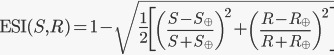

In [ ]:
# Threshold definition and distribution of the outcome analysis

interest_objects = df[df['esi'] > 0.30]
#interest_objects = df[df['is_habitable'] == 1]
len(interest_objects)/len(df)

0.20203119332607908

In [ ]:
#We want to add an index column to our dataset because for future algorithms we can't use the names columns as id

#We create a support dataset to see what index corresponds to each planet
#df_indices = pd.DataFrame()
#df_indices['Planet Name'] = df['pl_name']
#df_indices['Planet index'] = range(len(df))
#df_indices.head()

df['Planet index'] = range(len(df))
df.set_index('Planet index', inplace=True)
df.head()
#Now we have an index in our dataset


pl_name  hostname  default_flag  sy_snum  sy_pnum  \
Planet index                                                         
0               11 Com b    11 Com             0        2        1   
1               11 UMi b    11 UMi             0        1        1   
2               14 And b    14 And             0        1        1   
3               14 Her b    14 Her             1        1        2   
4             16 Cyg B b  16 Cyg B             0        3        1   

              discoverymethod  disc_year  \
Planet index                               
0             Radial Velocity       2007   
1             Radial Velocity       2009   
2             Radial Velocity       2008   
3             Radial Velocity       2002   
4             Radial Velocity       1996   

                                       disc_facility              soltype  \
Planet index                                                                
0                                   Xinglong Station  Published Confirmed   
1             Thueringer Landessternwarte Tautenburg  Published Confirmed   
2                  Okayama Astrophysical Observatory  Published Confirmed   
3                             W. M. Keck Observatory  Published Confirmed   
4                             Multiple Observatories  Published Confirmed   

              pl_controv_flag  ...         decstr    sy_dist  sy_vmag  \
Planet index                   ...                                      
0                           0  ...  +17d47m35.71s   93.18460  4.72307   
1                           0  ...  +71d49m26.19s  125.32100  5.01300   
2                           0  ...  +39d14m09.01s   75.43920  5.23133   
3                           0  ...  +43d48m58.90s   17.93230  6.61935   
4                           0  ...  +50d31m00.57s   21.13965  6.21500   

              sy_kmag  sy_gaiamag   rowupdate  pl_pubdate  releasedate  \
Planet index                                                             
0               2.282     4.44038  23/07/2014     2011-08   23/07/2014   
1               1.939     4.56216  25/04/2018     2011-08   23/07/2014   
2               2.331     4.91781  23/07/2014     2011-08   23/07/2014   
3               4.714     6.38300  12/06/2023     2022-09   12/06/2023   
4               4.651     6.06428  25/04/2018     1997-07   21/08/2014   

              is_habitable  esi  
Planet index                     
0                        0  0.0  
1                        0  0.0  
2                        0  0.0  
3                        0  0.0  
4                        0  0.0  

[5 rows x 34 columns]

### Data normalization

In [ ]:
scaler = MinMaxScaler()
columns_to_normalize = ['pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_bmasse', 'pl_orbeccen',
                                                'pl_eqt', 'pl_insol', 'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_logg',
                                                'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag']
df_norm = pd.DataFrame(index = df.index)
df_norm[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# We prepared a train set from the original df to be normalized and used later on
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train_norm = pd.DataFrame(index = df_train.index)
df_train_norm[columns_to_normalize] = scaler.fit_transform(df_train[columns_to_normalize])

df_m = df.drop(columns=columns_to_normalize)
df_train_m = df_train.drop(columns=columns_to_normalize)

merged_df = pd.concat([df_m, df_norm], axis=1)
merged_df_train = pd.concat([df_train_m, df_train_norm], axis=1)

# 'merged_df' Contains now the normalized columns in a range of 0 to 1
merged_df.head(5)

pl_name  hostname  default_flag  sy_snum  sy_pnum  \
Planet index                                                         
0               11 Com b    11 Com             0        2        1   
1               11 UMi b    11 UMi             0        1        1   
2               14 And b    14 And             0        1        1   
3               14 Her b    14 Her             1        1        2   
4             16 Cyg B b  16 Cyg B             0        3        1   

              discoverymethod  disc_year  \
Planet index                               
0             Radial Velocity       2007   
1             Radial Velocity       2009   
2             Radial Velocity       2008   
3             Radial Velocity       2002   
4             Radial Velocity       1996   

                                       disc_facility              soltype  \
Planet index                                                                
0                                   Xinglong Station  Published Confirmed   
1             Thueringer Landessternwarte Tautenburg  Published Confirmed   
2                  Okayama Astrophysical Observatory  Published Confirmed   
3                             W. M. Keck Observatory  Published Confirmed   
4                             Multiple Observatories  Published Confirmed   

              pl_controv_flag  ...  pl_insol   st_teff    st_rad   st_mass  \
Planet index                   ...                                           
0                           0  ...       0.0  0.000000  0.001412  0.237660   
1                           0  ...       0.0  0.000000  0.001412  0.155393   
2                           0  ...       0.0  0.000000  0.001412  0.109689   
3                           0  ...       0.0  0.000000  0.000847  0.083181   
4                           0  ...       0.0  0.101053  0.000847  0.091408   

                st_met  st_logg   sy_dist   sy_vmag   sy_kmag  sy_gaiamag  
Planet index                                                               
0             0.711340  0.00000  0.011295  0.128083  0.178851    0.219972  
1             0.711340  0.00000  0.015190  0.135946  0.167333    0.226005  
2             0.711340  0.00000  0.009144  0.141867  0.180496    0.243624  
3             0.711340  0.00000  0.002174  0.179508  0.260519    0.316208  
4             0.737113  0.75784  0.002562  0.168542  0.258404    0.300419  

[5 rows x 34 columns]

### Multicolinearity handling

In [ ]:
# This part proved to be a little bit tricky and a few steps were needed
# First we created a function to calculate the VIF (Variance Inflation Factor) for each variable

def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# List of variables we want to check for multicollinearity on the normalized dataset (as we are checking for numerical correlation)
variables_to_check = merged_df[columns_to_normalize]
vif_results = calculate_vif(variables_to_check)

# We set a threshold for VIF to determine multicollinearity and filter the variables with VIF exceeding the threshold
vif_threshold = 5
variables_with_multicollinearity = vif_results[vif_results["VIF"] > vif_threshold]

print(f'Variables with Multicollinearity: \n', variables_with_multicollinearity)

Variables with Multicollinearity: 
        Variable         VIF
0     pl_orbper   99.525106
4   pl_orbeccen   10.556828
7       st_teff    7.600205
10       st_met   67.062699
11      st_logg    7.175623
13      sy_vmag   78.686101
14      sy_kmag  108.597561
15   sy_gaiamag   63.604829


In [ ]:
# Therefore we adapt the train df to exclude the vars with a VIF over 70
merged_df_train = merged_df_train.drop(columns = ['pl_orbsmax', 'sy_vmag','sy_kmag'])

### Feature engeneering

In [ ]:
# For this step we will build a PCA object with the aim of reducing our dimensionality and anlyse the distribution of
# the data over the new features (components with a variance of 95% at least).

pca_columns = ['pl_orbper', 'pl_rade', 'pl_bmasse', 'pl_orbeccen', 'pl_eqt', 'pl_insol', 'st_teff', 'st_rad',
                            'st_mass', 'st_met', 'st_logg', 'sy_dist', 'sy_gaiamag', 'esi']
pca = PCA(.95).fit(merged_df_train[pca_columns])
pca_t = pca.transform(merged_df_train[pca_columns])

pca_df = pd.DataFrame(pca_t, index=merged_df_train['pl_name'] , columns=[f'PC{i+1}' for i in range(pca_t.shape[1])])

pca_df.head(5) # PCA created components; 6

PC1       PC2       PC3       PC4       PC5       PC6
pl_name                                                                  
Kepler-733 b  -0.249566  0.040137 -0.067655  0.037361  0.083084 -0.109059
L 98-59 b     -0.315085  0.074971  0.179181 -0.060574 -0.100459 -0.028639
Kepler-1457 b -0.196628 -0.025296 -0.090310  0.102916 -0.084398  0.001972
Kepler-1121 b -0.129889 -0.043136 -0.026838  0.038553 -0.121540 -0.086807
HD 28109 c    -0.102883 -0.095000  0.128674 -0.076532 -0.028611 -0.009656

In [ ]:
# Merge PCA data with train  df
merged_pca_df = pd.merge(merged_df_train, pca_df, on='pl_name')
merged_pca_df.head(5)

pl_name     hostname  default_flag  sy_snum  sy_pnum discoverymethod  \
0   Kepler-733 b   Kepler-733             0        1        1         Transit   
1      L 98-59 b      L 98-59             0        1        4         Transit   
2  Kepler-1457 b  Kepler-1457             1        1        1         Transit   
3  Kepler-1121 b  Kepler-1121             1        1        1         Transit   
4     HD 28109 c     HD 28109             1        1        3         Transit   

   disc_year                                 disc_facility  \
0       2016                                        Kepler   
1       2019  Transiting Exoplanet Survey Satellite (TESS)   
2       2016                                        Kepler   
3       2016                                        Kepler   
4       2022  Transiting Exoplanet Survey Satellite (TESS)   

                                 soltype  pl_controv_flag  ...    st_met  \
0  Kepler Project Candidate (q1_q12_koi)                0  ...  0.819588   
1                 TESS Project Candidate                0  ...  0.711340   
2                    Published Confirmed                0  ...  0.685567   
3                    Published Confirmed                0  ...  0.773196   
4                    Published Confirmed                0  ...  0.711340   

    st_logg   sy_dist sy_gaiamag       PC1       PC2       PC3       PC4  \
0  0.771777  0.111116   0.762673 -0.249566  0.040137 -0.067655  0.037361   
1  0.860627  0.001287   0.524995 -0.315085  0.074971  0.179181 -0.060574   
2  0.767422  0.107883   0.694949 -0.196628 -0.025296 -0.090310  0.102916   
3  0.721254  0.058435   0.595311 -0.129889 -0.043136 -0.026838  0.038553   
4  0.719512  0.016923   0.460701 -0.102883 -0.095000  0.128674 -0.076532   

        PC5       PC6  
0  0.083084 -0.109059  
1 -0.100459 -0.028639  
2 -0.084398  0.001972  
3 -0.121540 -0.086807  
4 -0.028611 -0.009656  

[5 rows x 37 columns]

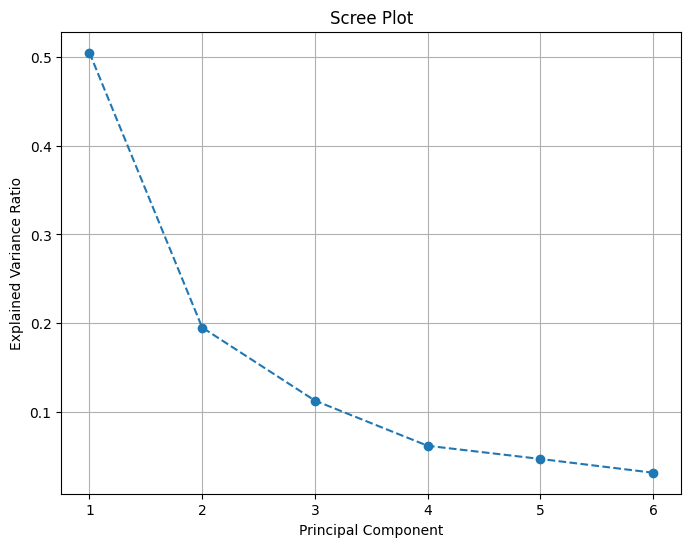

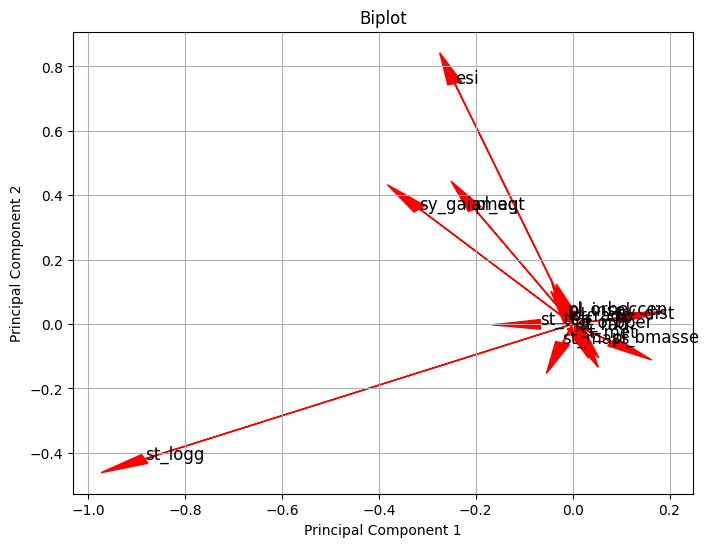

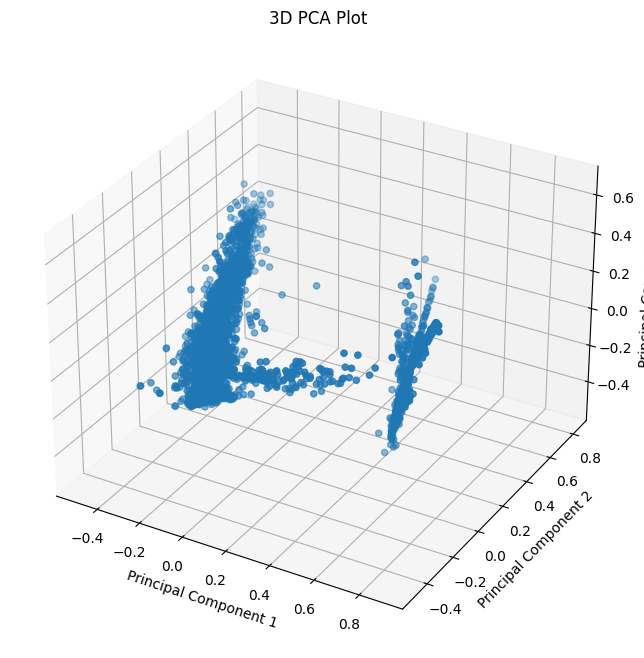

In [ ]:
#@title Feature + data plot and analysis

# Scree plot to show explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

# Biplot to visualize the principal components and original features
components = pca.components_
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.1, fc='r', ec='r')
    plt.text(x, y, merged_df_train[pca_columns].columns[i], fontsize=12)
plt.title("Biplot")
plt.grid(True)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 3D plot for the first three principal components
if pca.n_components_ >= 3:
    pca_3d = PCA(n_components=3).fit(merged_df_train[pca_columns])
    pca_3d_t = pca_3d.transform(merged_df_train[pca_columns])

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_3d_t[:, 0], pca_3d_t[:, 1], pca_3d_t[:, 2])
    ax.set_title("3D PCA Plot")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")
    plt.show()

## Target variable redefinition
To deal with the massively low proportion of objects of interest in our data we must redifine the way we identify our possible objects of study. In order to do so, we researched for a way to compute an index of earth's similarity, which would classify our planets by a continous value inbetween [0, 1] and a threshold.


For that purpose we encountered with a formula developed by the PHL and NASA:

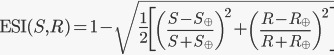

In [ ]:
# This code has been implemented in the "Distribution of the Outcome" task at the begining of the 2nd Block of preprocessing
# DO NOT RUN !

# def calculate_esi(pl_insol, pl_rade, s_earth=1000, r_earth=0.001):
#     esi = 1 - np.sqrt(1/2 * (((pl_insol - s_earth) / (pl_insol + s_earth))**2 + ((pl_rade - r_earth) / (pl_rade + r_earth))**2))
#     return esi

# # Aplicar la función a cada fila
# df['esi'] = df.apply(lambda col: calculate_esi(col['pl_insol'], col['pl_rade']), axis=1)

# print(f'num of cols: 34 \nnum of rows:',len(df))
# df[['pl_rade', 'pl_insol', 'esi']].describe()

In [ ]:
# Dataframe with study objects of interest

interest_objects = df[df['esi'] > 0.30]
print(f'Objects of interest ratio:',len(interest_objects)*100/len(df)) # 20.2%

Objects of interest ratio: 20.20311933260791


# 🛑 Task 1: Regression

## **1. Linear Regression**

Mean squared error: 0.0014615725601771976


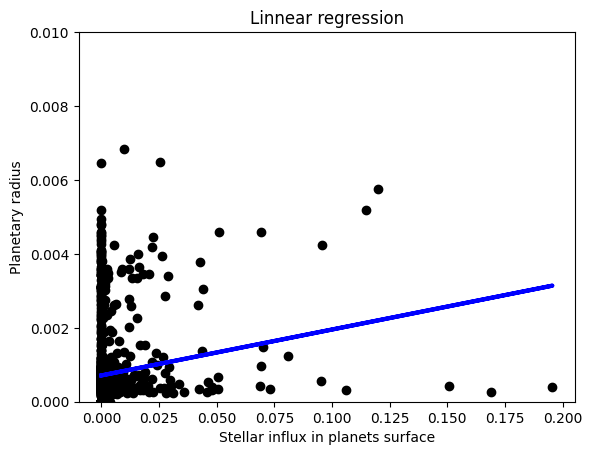

In [ ]:
#Linnear regression model
model = LinearRegression()
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = merged_df.copy()
df_imputed[['pl_insol', 'pl_rade']] = imputer.fit_transform(merged_df[['pl_insol', 'pl_rade']])

X_train, X_test, y_train, y_test = train_test_split(df_imputed['pl_insol'].values.reshape(-1, 1), df_imputed['pl_rade'], test_size=0.2, random_state=42)


model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)


print(f'Mean squared error: {mse}')


plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)
plt.xlabel('Stellar influx in planets surface',)
plt.ylabel('Planetary radius')
plt.ylim(0, 0.01)
plt.title('Linnear regression')
plt.show()

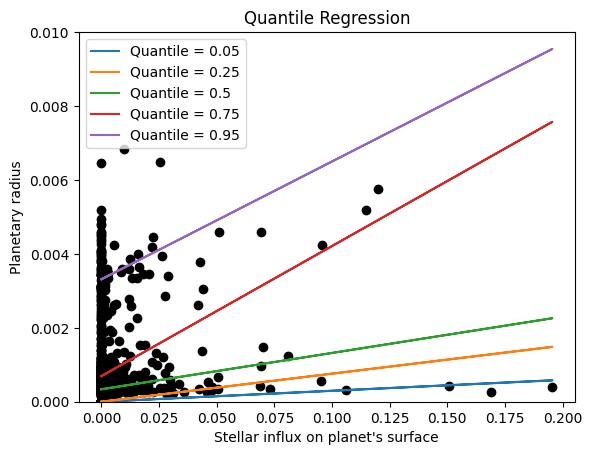

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = merged_df.copy()
df_imputed[['pl_insol', 'pl_rade']] = imputer.fit_transform(merged_df[['pl_insol', 'pl_rade']])
X_train, X_test, y_train, y_test = train_test_split(df_imputed['pl_insol'], df_imputed['pl_rade'], test_size=0.2, random_state=42)# Split the data
train_data = pd.DataFrame({'pl_insol': X_train, 'pl_rade': y_train})# Creating a DataFrame for training data
test_data = pd.DataFrame({'pl_insol': X_test})
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]# Quantiles to model
plt.scatter(X_test, y_test, color='black')# Plotting

for qt in quantiles:
    mod = smf.quantreg('pl_rade ~ pl_insol', train_data)# Fitting quantile regression
    res = mod.fit(q=qt)
    test_data[f'prediction_q{qt}'] = res.predict(test_data)# Making predictions
    plt.plot(test_data['pl_insol'], test_data[f'prediction_q{qt}'], label=f'Quantile = {qt}')  # Plotting finally

plt.xlabel("Stellar influx on planet's surface")
plt.ylabel('Planetary radius')
plt.ylim(0, 0.01)
plt.title('Quantile Regression')
plt.legend()
plt.show()

## **2. SVR Regression**

Mean absolute error: 0.14
Mean absolute percentage error: 258908911031394.47
R^2 error: 0.18
Adjusted R^2 erro: 0.18


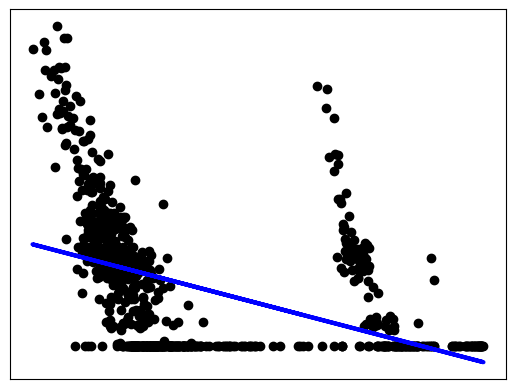

In [ ]:
#2 SVR Regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression,TweedieRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR

# Load the dataset
X = merged_pca_df[['PC1','PC2','PC3','PC4','PC5','PC6']]
y = merged_pca_df['esi']

# Use only one feature
X = X[['PC1']]

# Split the targets into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Create linear regression object
regr = LinearSVR()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

#Print different errors:
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

#The mean absolute percentage error
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test, y_pred))

#The R^2 error
print("R^2 error: %.2f" % r2_score(y_test, y_pred))
n = len(y_test)
k = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj = 1 - (n -1)*(1 - r2)/(n - k -1)
print("Adjusted R^2 erro: %.2f" % adj)

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Mean Squared Error: 0.00481369939818652


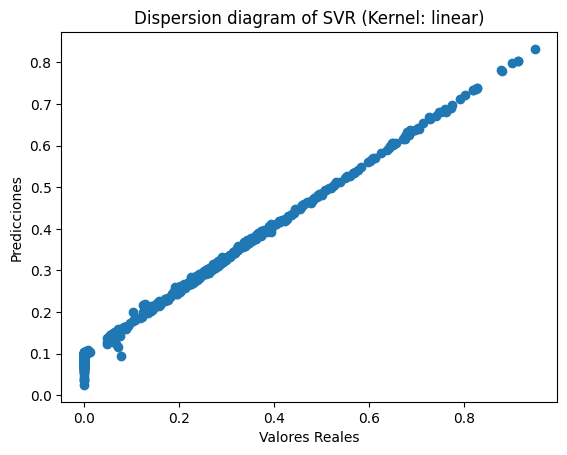

        Actual  Predicted  Difference
3229  0.260122   0.297719   -0.037597
2267  0.265051   0.302649   -0.037598
3686  0.292683   0.321817   -0.029134
3971  0.283739   0.319816   -0.036077
1084  0.000000   0.096723   -0.096723


In [ ]:
# @title 1st Kernel: Linear
#Usamos SVR (porque la variable objetivo que hemos seleccionado es continua (si no, SVC))

X = merged_pca_df[['PC1','PC2','PC3','PC4','PC5','PC6']]
y = merged_pca_df['esi']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

svr_classifier = SVR(kernel='linear', C = 0.05)
svr_classifier.fit(X_train, y_train)

y_pred = svr_classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

#Diagrama de dispersión
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Dispersion diagram of SVR (Kernel: linear)')

plt.show()


comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})

#We also wanted to see if the calculated mean Squared error was "okay" taking 5 random exapmles and comparing the predicted values with the real ones
#Sampling five rows for display
sample_comparison = comparison_df.sample(5)
print(sample_comparison)

Mean Squared Error: 0.0033172359938828306


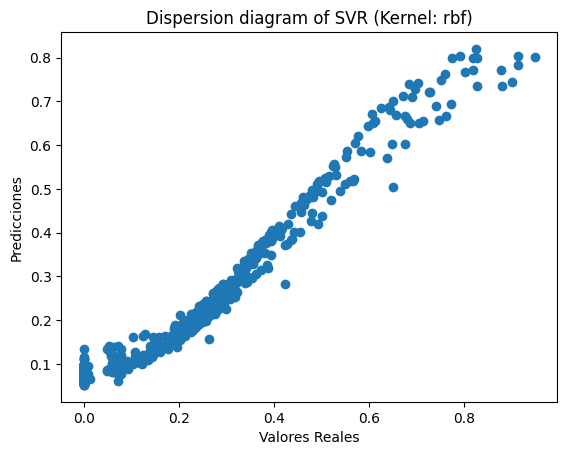

        Actual  Predicted  Difference
2148  0.274309   0.312316   -0.038007
1593  0.048928   0.127631   -0.078703
1860  0.072553   0.142443   -0.069890
4125  0.000000   0.093186   -0.093186
626   0.195245   0.249232   -0.053987


In [ ]:
# @title 2nd Kernel: RBF

svr_classifier = SVR(kernel='rbf', C=0.05)
svr_classifier.fit(X_train, y_train)

y_pred = svr_classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

#Diagrama de dispersión
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Dispersion diagram of SVR (Kernel: rbf)')

plt.show()

#We also wanted to see if the calculated mean Squared error was "okay" taking 5 random exapmles and comparing the predicted values with the real ones
# Sampling five rows for display
sample_comparison = comparison_df.sample(5)
print(sample_comparison)

Mean Squared Error: 10.418393247985582


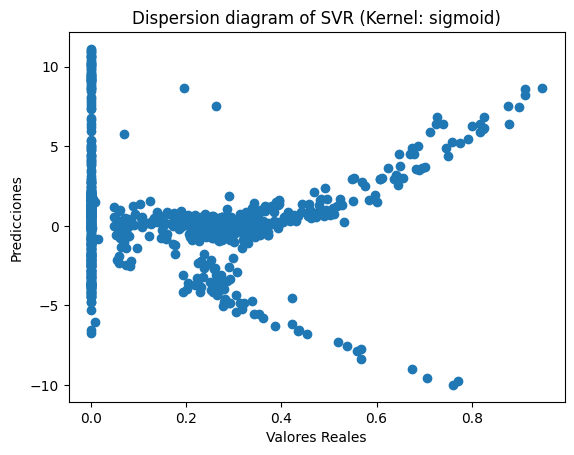

        Actual  Predicted  Difference
1808  0.291174   0.320711   -0.029536
1643  0.000000   0.093449   -0.093449
657   0.701710   0.641877    0.059833
211   0.361881   0.381238   -0.019357
2499  0.124575   0.215958   -0.091383


In [ ]:
#@title 3rd Kernel: Sigmoid

svr_classifier = SVR(kernel='sigmoid', C=0.05)
svr_classifier.fit(X_train, y_train)

y_pred = svr_classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

#Diagrama de dispersión
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Dispersion diagram of SVR (Kernel: sigmoid)')

plt.show()

#We also wanted to see if the calculated mean Squared error was "okay" taking 5 random exapmles and comparing the predicted values with the real ones
# Sampling five rows for display
sample_comparison = comparison_df.sample(5)
print(sample_comparison)

Mean Squared Error: 0.00811417234982804


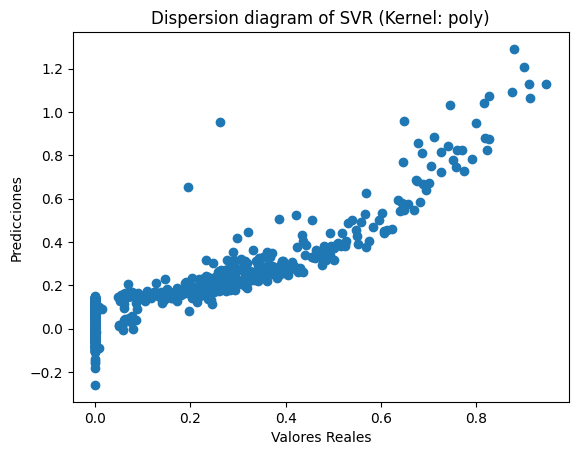

        Actual  Predicted  Difference
2522  0.197377   0.247775   -0.050398
2406  0.000000   0.095111   -0.095111
2148  0.274309   0.312316   -0.038007
650   0.000000   0.097463   -0.097463
2835  0.262612   0.295636   -0.033024


In [ ]:
#@title 4rd Kernel: Polinomial

svr_classifier = SVR(kernel='poly', C=0.05)
svr_classifier.fit(X_train, y_train)

y_pred = svr_classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

#Diagrama de dispersión
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Dispersion diagram of SVR (Kernel: poly)')

plt.show()

#We also wanted to see if the calculated mean Squared error was "okay" taking 5 random exapmles and comparing the predicted values with the real ones
# Sampling five rows for display
sample_comparison = comparison_df.sample(5)
print(sample_comparison)

## **3. Logistic Regression**

In [ ]:
merged_pca_df['is_Habitable'] = (merged_pca_df['esi'] > 0.3).astype(int)
X = merged_pca_df[['PC1','PC2','PC3','PC4','PC5','PC6']]
y = merged_pca_df['is_Habitable']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
habitable_LR = LogisticRegression(solver = 'lbfgs', random_state = 0)
habitable_LR.fit(X_train, y_train)
predict = habitable_LR.predict(X_test)
print("This is our accuracy:", accuracy_score(y_test, predict))


This is our accuracy: 0.9592298980747452


In [ ]:
columns = ['pl_rade', 'pl_bmasse', 'pl_insol', 'pl_eqt','st_mass', 'st_met', 'sy_dist']
y = merged_pca_df['is_Habitable']
X = merged_pca_df[columns]
logistic_model = sm.Logit(y, X)
logistic_model_result = logistic_model.fit()
print(logistic_model_result.summary2())

Optimization terminated successfully.
         Current function value: 0.327513
         Iterations 11
                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: is_Habitable     Pseudo R-squared: 0.352    
Date:               2024-01-10 10:46 AIC:              2903.3214
No. Observations:   4411             BIC:              2948.0644
Df Model:           6                Log-Likelihood:   -1444.7  
Df Residuals:       4404             LL-Null:          -2229.0  
Converged:          1.0000           LLR p-value:      0.0000   
No. Iterations:     11.0000          Scale:            1.0000   
----------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------
pl_rade      -56.6388   6.8365  -8.2847 0.0000 -70.0382 -43.2395
pl_bmasse    -57.1397   8.1409  -7.0188 0.0000 -73.0956 -41.1837
pl_insol    

As we do not have any p_value unde the 0.05 we stay that this parameters are the choosen one for our Logistic Regression


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logistic_model2 = LogisticRegression()
logistic_model2.fit(X_train, y_train)
predict2 = logistic_model2.predict(X_test)
print('The new accuracy is : {:.5f}'.format(logistic_model2.score(X_test, predict2)))

The new accuracy is : 1.00000


Our fits perfectly with our second model in relation with the test set


In [ ]:
confusion_matrix = confusion_matrix(y_test, predict2)
print(confusion_matrix)

[[1026   50]
 [ 165   83]]


True Predcitions: 1026, 83




False Predictions: 165, 50

In [ ]:
print(classification_report(y_test, predict2))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1076
           1       0.62      0.33      0.44       248

    accuracy                           0.84      1324
   macro avg       0.74      0.64      0.67      1324
weighted avg       0.82      0.84      0.82      1324



So we get that the 86% of the habitable planets are correctly predicted, in the other hand 62% of the not habitable are correctly predicted

## **Previous/common code for next regressions**

In [ ]:
# Load the dataset
X = merged_pca_df[['PC1','PC2','PC3','PC4','PC5','PC6']]
y = merged_pca_df['esi']

# Use only one feature
X = X[['PC1']]

# Split the targets into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## **4. Tweedie Regression**

Coefficients: 
 [-0.02714573]
Mean absolute error: 0.16
R^2 error: 0.04
Adjusted R^2 erro: 0.04
RMSE: 0.20


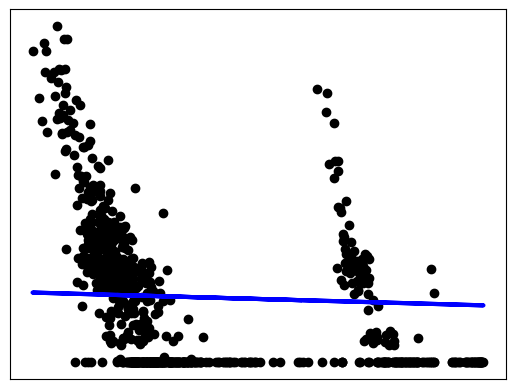

In [ ]:
#4.1 Tweedie Regression

# Create linear regression object
regr = TweedieRegressor()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)

#Print different errors:
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

#The R^2 error
print("R^2 error: %.2f" % r2_score(y_test, y_pred))
n = len(y_test)
k = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj = 1 - (n -1)*(1 - r2)/(n - k -1)
print("Adjusted R^2 erro: %.2f" % adj)

#Root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %.2f" % rmse)

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## **5. Quantile Regression**

Coefficients: 
 [0.]
R^2 error: -0.00
Adjusted R^2 erro: -0.00
RMSE: 0.20


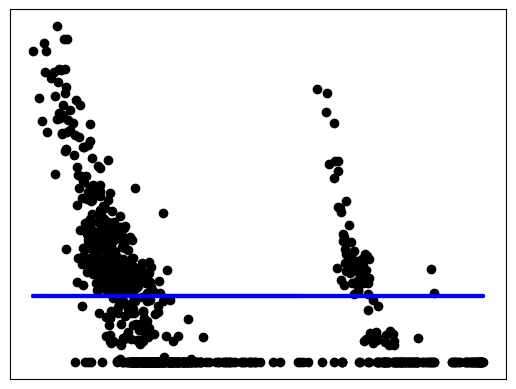

In [ ]:
#Quantile Regression

# Create linear regression object
regr = QuantileRegressor(solver='revised simplex')

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)

#The R^2 error
print("R^2 error: %.2f" % r2_score(y_test, y_pred))
n = len(y_test)
k = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj = 1 - (n -1)*(1 - r2)/(n - k -1)
print("Adjusted R^2 erro: %.2f" % adj)

#Root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %.2f" % rmse)

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## **6. LinearSVR Regression**

Mean absolute error: 0.14
R^2 error: 0.18
Adjusted R^2 erro: 0.18
RMSE: 0.18


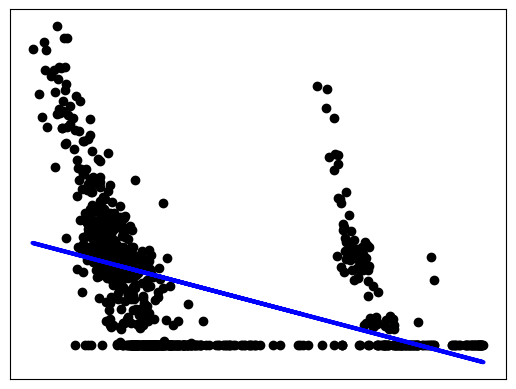

In [ ]:
# Create linear regression object
regr = LinearSVR()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

#Print different errors:
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

#The R^2 error
print("R^2 error: %.2f" % r2_score(y_test, y_pred))
n = len(y_test)
k = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj = 1 - (n -1)*(1 - r2)/(n - k -1)
print("Adjusted R^2 erro: %.2f" % adj)

#Root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %.2f" % rmse)

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#El R^2 puede dar negativo: Cuando el modelo es peor que un modelo que simplemente predice la media
#de la variable dependiente para todos los puntos de datos. Mi modelo no está explicando mejor la
#variabilidad de los datos que simplemente usar la madia.

## **7. KNeighbors Regressor**

Mean absolute error: 0.08
R^2 error: 0.69
Adjusted R^2 erro: 0.69
RMSE: 0.11


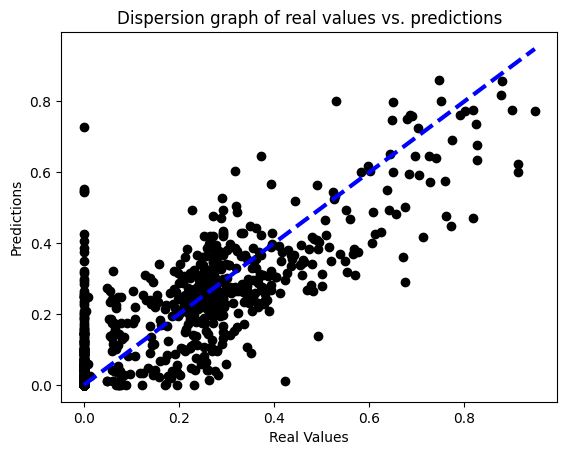

In [ ]:
#2 KNeighborsRegressor

# Create linear regression object
regr = KNeighborsRegressor()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


#Print different errors:
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

#The R^2 error
print("R^2 error: %.2f" % r2_score(y_test, y_pred))
n = len(y_test)
k = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj = 1 - (n -1)*(1 - r2)/(n - k -1)
print("Adjusted R^2 erro: %.2f" % adj)

#Root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %.2f" % rmse)

#Plot output
plt.scatter(y_test, y_pred, color="black")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=3)

plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.title("Dispersion graph of real values vs. predictions")

plt.show()

## **8. SGDR Regressor**

Coefficients: 
 [-0.23427714]
Mean absolute error: 0.14
R^2 error: 0.18
Adjusted R^2 erro: 0.18
RMSE: 0.18


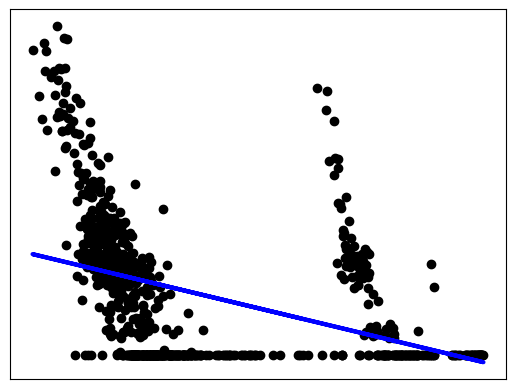

In [ ]:
#SGDR Regression
regr = SGDRegressor()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)

#Print different errors:
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

#The R^2 error
print("R^2 error: %.2f" % r2_score(y_test, y_pred))
n = len(y_test)
k = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj = 1 - (n -1)*(1 - r2)/(n - k -1)
print("Adjusted R^2 erro: %.2f" % adj)

#Root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %.2f" % rmse)

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## **9. Polynomial Features**

Mean absolute error: 0.12
Mean absolute percentage error: 228173379558475.44
R^2 error: 0.35
Adjusted R^2 erro: 0.35
RMSE: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


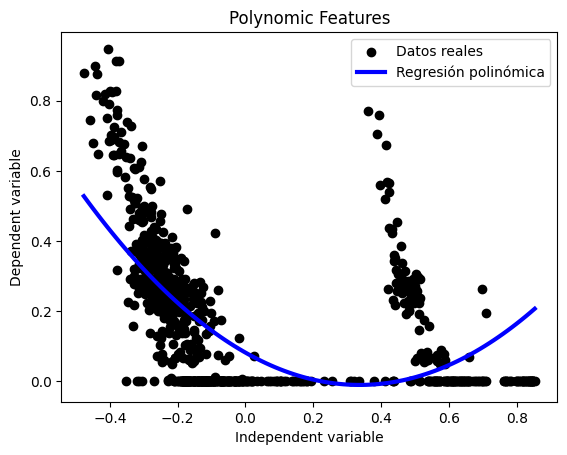

In [ ]:
#Polinomial features
deg = 2
regr = make_pipeline(PolynomialFeatures(deg), LinearRegression())

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

#Print different errors:
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

#The mean absolute percentage error
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test, y_pred))

#The R^2 error
print("R^2 error: %.2f" % r2_score(y_test, y_pred))
n = len(y_test)
k = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj = 1 - (n -1)*(1 - r2)/(n - k -1)
print("Adjusted R^2 erro: %.2f" % adj)

#Root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %.2f" % rmse)

# Plot outputs
X_plot = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_plot = regr.predict(X_plot)

plt.scatter(X_test, y_test, color="black", label="Datos reales")
plt.plot(X_plot, y_plot, color="blue", linewidth=3, label="Regresión polinómica")

plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.title("Polynomic Features")
plt.legend()

plt.show()

## **10. Gaussian Process Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Mean absolute error: 0.16
R^2 error: -0.60
Adjusted R^2 erro: -0.61
RMSE: 0.26


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


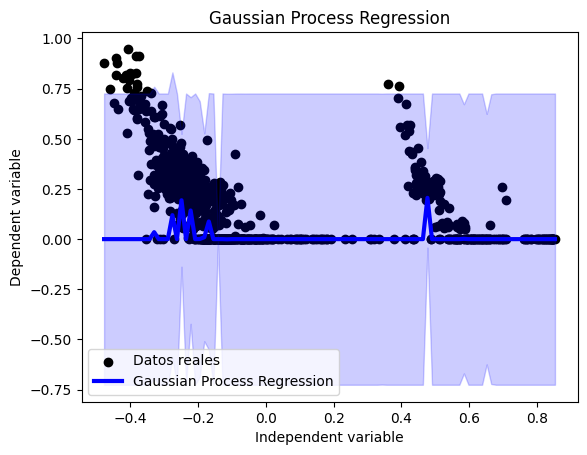

In [ ]:
#Gaussian Process Regression
ker = 1.0*RBF()
regr = GaussianProcessRegressor(kernel = ker)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

#Print different errors:
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

#The R^2 error
print("R^2 error: %.2f" % r2_score(y_test, y_pred))
n = len(y_test)
k = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj = 1 - (n -1)*(1 - r2)/(n - k -1)
print("Adjusted R^2 erro: %.2f" % adj)

#Root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %.2f" % rmse)

# Plot outputs
X_plot = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)

# Predecir para los puntos más densos
y_plot, sigma = regr.predict(X_plot, return_std=True)

# Gráfico de dispersión con puntos más densos y línea de regresión
plt.scatter(X_test, y_test, color="black", label="Datos reales")
plt.plot(X_plot, y_plot, color="blue", linewidth=3, label="Gaussian Process Regression")
plt.fill_between(X_plot.flatten(), y_plot - sigma, y_plot + sigma, color='blue', alpha=0.2)

plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.title("Gaussian Process Regression")
plt.legend()

plt.show()

##**11. DecisionTree Regression**

In [ ]:
#DecisionTree Regression
regr = DecisionTreeRegressor()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

#Print different errors:
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

#The R^2 error
print("R^2 error: %.2f" % r2_score(y_test, y_pred))
n = len(y_test)
k = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj = 1 - (n -1)*(1 - r2)/(n - k -1)
print("Adjusted R^2 erro: %.2f" % adj)

#Root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %.2f" % rmse)

Mean absolute error: 0.09
R^2 error: 0.47
Adjusted R^2 erro: 0.47
RMSE: 0.15


# 🛑 Task 2: Classification



## **2. Classification**

### **2.1 Support Vector Machine**

In [ ]:
merged_pca_df['is_Habitable'] = (merged_pca_df['esi'] > 0.3).astype(int)

X = merged_pca_df[['PC1','PC2','PC3','PC4','PC5','PC6']]
y = merged_pca_df['is_Habitable']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X_train, y_train)
        y_pred = svc.predict(X_test)
        score = accuracy_score(y_test, y_pred)

        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

final_svc = svm.SVC(C=best_params['C'], gamma=best_params['gamma'])
final_svc.fit(X_train, y_train)
y_final_pred = final_svc.predict(X_test)
final_score = accuracy_score(y_test, y_final_pred)

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Final Model Score:", final_score)

Best Score: 0.9954699886749717
Best Parameters: {'C': 100, 'gamma': 1}
Final Model Score: 0.9954699886749717


Some conclusions:
Our objetive here was to use a SVM classification algorithm showed in class. We wanted to use it in the merged_pca_df dataset and look after the PC1, PC2, PC3, PC4, PC5 and PC6 variables obteined in the PCA and the 'esi' variable obteined in the formula. The main problem is that 'esi' is a continous variable and we can't perform a SVC in it. We decided to create a binary variable 'is_Habitable' in order to perform a SVM. After creating it we performed the code in order to obtain best_score, best_params and final_score. We will use the results of best_params (C and gamma) to calculate the score with the kernels.

In [ ]:
accuracy_train = svc.score(X_train, y_train)
accuracy_test = svc.score(X_test, y_test)

print("Accuracy on training set: ", accuracy_train)
print("Accuracy on test set: ", accuracy_test)

#Accuracy on training set:  0.9722222222222222
#Accuracy on test set:  0.8799546998867497

Accuracy on training set:  1.0
Accuracy on test set:  0.984144960362401


We wanted to see the difference in accuracy between the training set: 97.22% and the test set: 87.99%. We can see that the training set accuracy is a little bigger, what is normal, but the difference isn't really big.

In [ ]:
svc = svm.SVC(C=100, kernel='rbf', gamma=30, probability=True)
svc.fit(merged_pca_df[['PC1','PC2','PC3','PC4','PC5','PC6']], merged_pca_df['is_Habitable'])
svc.score(merged_pca_df[['PC1','PC2','PC3','PC4','PC5','PC6']], merged_pca_df['is_Habitable'])

1.0

In [ ]:
svc = svm.SVC(C=100, kernel='sigmoid', gamma=30, probability=True)
svc.fit(merged_pca_df[['PC1','PC2','PC3','PC4','PC5','PC6']], merged_pca_df['is_Habitable'])
svc.score(merged_pca_df[['PC1','PC2','PC3','PC4','PC5','PC6']], merged_pca_df['is_Habitable'])

0.7284062570845613

In [ ]:
svc = svm.SVC(C=100, kernel='linear', gamma=30, probability=True)
svc.fit(merged_pca_df[['PC1','PC2','PC3','PC4','PC5','PC6']], merged_pca_df['is_Habitable'])
svc.score(merged_pca_df[['PC1','PC2','PC3','PC4','PC5','PC6']], merged_pca_df['is_Habitable'])

0.9943323509408297

In [ ]:
#svc = svm.SVC(C=100, kernel='poly', gamma=30, probability=True)
#svc.fit(merged_pca_df[['PC1','PC2','PC3','PC4','PC5','PC6']], merged_pca_df['is_Habitable'])
#svc.score(merged_pca_df[['PC1','PC2','PC3','PC4','PC5','PC6']], merged_pca_df['is_Habitable'])
#this code take hours to run, so you can mark this code as a comment to run the rest of the code

Last we obtained the accuracy score for each kernel. We can see that mostly all of them have an accuracy over 71%, which is a really good accuracy for our model.

Text(0.5, 1.0, 'is_Habitable')

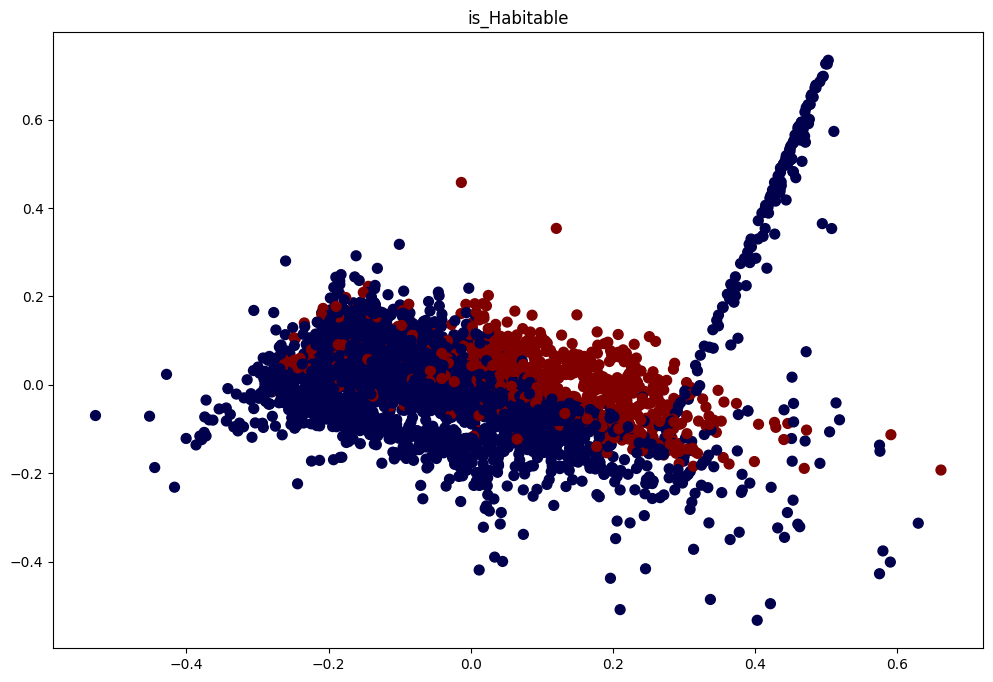

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(merged_pca_df['PC3'], merged_pca_df['PC4'], s=50, c=merged_pca_df['is_Habitable'], cmap='seismic')
ax.set_title('is_Habitable')



---



### **2.2 Decision Trees**

In [ ]:
# First we have to create our model of the decision tree with its function
merged_pca_df['is_Habitable'] = (merged_pca_df['esi'] > 0.3).astype(int)
#Here we have the same problemas as before and we need a variable that dont give us problem because is continuos as is 'esi'
X = merged_pca_df[['PC1','PC2','PC3','PC4','PC5','PC6']]
y = merged_pca_df['is_Habitable']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

decisionTree = tree.DecisionTreeClassifier(random_state=0)
decisionTree.fit(X_train, y_train)
y_pred = decisionTree.predict(X_test)
# We have to now the accuracy in order to now if our model fits
accuracy  = metrics.accuracy_score(y_test, y_pred)
#Also the recall of our model
reccal = metrics.recall_score(y_test, y_pred)
print("Our model accuracy =  ",accuracy)
#The recall is used to know the positive values that are correctly classified
print("Our model recall = ",reccal)

Our model accuracy =   0.9807474518686297
Our model recall =  0.9444444444444444


In [ ]:
#In order to check the bests hyperparamters we are gonna use the Grid Search
#We change the parameters of the param_grid in order to know which intervals have the best result

param_grid = {
    'max_depth': [20,40,70],
    'max_features': [4,5,6],
    'min_samples_leaf': [4,5,6],
    'min_samples_split': [10,11,12],
}
decisionTree2 = tree.DecisionTreeClassifier(random_state=0)
gridSearch = GridSearchCV(estimator=decisionTree2, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)


gridSearch.fit(X_train, y_train)
gridSearch.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


{'max_depth': 20,
 'max_features': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 12}

In [ ]:
#Now we are going to set those hyperparametres that we have created and see how the accuracy change
decisionTree3 = tree.DecisionTreeClassifier(random_state=0, max_depth =20, max_features = 4, min_samples_leaf = 3, min_samples_split = 12)
#After that just follow the same steps as we have created the first model
decisionTree3.fit(X_train, y_train)
y_pred = decisionTree3.predict(X_test)

accuracy  = metrics.accuracy_score(y_test, y_pred)

reccal = metrics.recall_score(y_test, y_pred)
print("Our model accuracy =  ",accuracy)
print("Our model recall = ",reccal)

Our model accuracy =   0.9762174405436014
Our model recall =  0.9222222222222223


### **2.3 Naive Bayes**

In [ ]:
# @title Naive Bayes model
# Let's define a variable with more labels than 0 and 1 (Which proved to be problematic, so here's my new 3 classes categorical variable)
def classify_esi_classes(value):
  if value < 0.3:
    return 'inhospitable'
  elif 0.3 < value < 0.7:
    return 'possible'
  elif value > 0.7:
    return 'likely'

merged_pca_df['esi_classes'] = merged_pca_df['esi'].apply(classify_esi_classes)

# https://scikit-learn.org/stable/modules/naive_bayes.html
# We will try to take several approaches regarding the Naive Bayes classification model based on the sklearn naive_bayes available libraries (Refer to the link above).

X_bin = merged_pca_df[['default_flag','sy_snum','sy_pnum','pl_controv_flag']] # Nonsense, however needed to check out the Complement and Multinomial algorithms
y_bin = merged_pca_df['esi_classes'] # As the Naive Bayes algorithm requires a cathegorical labels setting, we will build a special test train split data partition for our purpose.
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X ,y_bin,test_size=0.2, random_state=42)

# First of all we must define the classifiers to be used
GNB = GaussianNB()
BNB = BernoulliNB()
CaNB = CategoricalNB()
CoNB = ComplementNB() # ""
MNB = MultinomialNB() # This two Bayes modalities are not useful for our data since they need categorical features (X_bin), and ours do not add any value towards our goal.

accs_per_fold_GNB = cross_val_score(GNB, X, y_bin, cv=5, scoring='accuracy')
accs_per_fold_BNB = cross_val_score(BNB, X, y_bin, cv=5, scoring='accuracy')
accs_per_fold_CaNB = cross_val_score(CaNB, X, y_bin, cv=5, scoring='accuracy')
accs_per_fold_CoNB = cross_val_score(CoNB, X_bin, y_bin, cv=5, scoring='accuracy')
accs_per_fold_MNB = cross_val_score(MNB, X_bin, y_bin, cv=5, scoring='accuracy')

accuracies_per_fold = [['Gaussian:', accs_per_fold_GNB],['Bernoulli:', accs_per_fold_BNB],['Categorical:', accs_per_fold_CaNB],['Complement:', accs_per_fold_CoNB],['Multinomial:', accs_per_fold_MNB]]

for accuracy in accuracies_per_fold :
  print('Accuracy per fold for distribution ',accuracy)

# Fit the data with the best performing model on the accuracy records
GNB.fit(X_train_bin ,y_train_bin)
y_pred = GNB.predict(X_test_bin)

report = classification_report(y_test_bin, y_pred)
print("Classification Report:\n", report)

Accuracy per fold for distribution  ['Gaussian:', array([0.94677237, 0.94331066, 0.93877551, 0.93877551, 0.92970522])]
Accuracy per fold for distribution  ['Bernoulli:', array([0.88448471, 0.87981859, 0.86848073, 0.87868481, 0.88208617])]
Accuracy per fold for distribution  ['Categorical:', array([0.79614949, 0.79705215, 0.79705215, 0.79591837, 0.79591837])]
Accuracy per fold for distribution  ['Complement:', array([0.47565119, 0.47278912, 0.45238095, 0.45918367, 0.46258503])]
Accuracy per fold for distribution  ['Multinomial:', array([0.79614949, 0.79705215, 0.79705215, 0.79591837, 0.79591837])]
Classification Report:
               precision    recall  f1-score   support

inhospitable       0.94      0.99      0.96       703
      likely       0.92      0.92      0.92        25
    possible       0.95      0.68      0.79       155

    accuracy                           0.94       883
   macro avg       0.93      0.87      0.89       883
weighted avg       0.94      0.94      0.93   

### **2.4 Random Forest**

In [ ]:
#@title Random Forest
randomForest = RandomForestClassifier(n_estimators=1000)
randomForest.fit(X_train, y_train)
y_pred = randomForest.predict(X_test)
accuracy  = metrics.accuracy_score(y_test, y_pred)
reccal = metrics.recall_score(y_test, y_pred)
print("Our model accuracy =  ",accuracy)
print("Our model recall = ",reccal)#great accuracy!

Our model accuracy =   0.984144960362401
Our model recall =  0.9277777777777778


In [ ]:
param_grid = {
    'max_depth': [20,40,70],
    'max_features': [4,5,6],
    'min_samples_split': [11,12,13],
}
decisionTree2 = tree.DecisionTreeClassifier(random_state=0)
gridSearch = GridSearchCV(estimator=decisionTree2, param_grid=param_grid, scoring='recall', #definde the method function
                           cv=5, n_jobs=-1, verbose=2)

gridSearch.fit(X_train, y_train)
gridSearch.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'max_depth': 20, 'max_features': 6, 'min_samples_split': 12}

In [ ]:
randomForest3 = RandomForestClassifier(n_estimators= 10000,max_depth =20, max_features = 4, min_samples_split = 12)#hyperparameter
randomForest3.fit(X_train, y_train)
y_pred = randomForest3.predict(X_test)

accuracy  = metrics.accuracy_score(y_test, y_pred)

reccal = metrics.recall_score(y_test, y_pred)
print("Our model accuracy =  ",accuracy)
print("Our model recall = ",reccal)

Our model accuracy =   0.984144960362401
Our model recall =  0.9333333333333333


# 🛑 Task 3: Clustering



## **3. Clustering**

In [ ]:
# @title Data preparation
# from sklearn.cluster import HDBSCAN returns error

clustering_df = merged_pca_df
habitable_Planets = clustering_df['esi_classes'] # Domain knowledge 3 classes (defined at the Naive Bayes code cell)
reduced_data = clustering_df[['PC1','PC2','PC3','PC4','PC5','PC6']]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(reduced_data, habitable_Planets ,test_size=0.2, random_state=42)

def hopkins(X, portion=0.1, seed=247):
  # X: numpy array of shape (n_samples, n_features)
  n = X.shape[0]
  d = X.shape[1]
  m = int(portion * n)

  np.random.seed(seed)
  nbrs = NearestNeighbors(n_neighbors=1).fit(X)
  # u_dist
  rand_X = np.random.uniform(X.min(axis=0), X.max(axis=0), size=(m,d))
  u_dist = nbrs.kneighbors(rand_X, return_distance=True)[0]
  # w_dist
  idx = np.random.choice(n, size=m, replace=False)
  w_dist = nbrs.kneighbors(X[idx,:], 2, return_distance=True)[0][:,1]

  U = (u_dist**d).sum()
  W = (w_dist**d).sum()
  H = U / (U + W)
  return H

### 3.1 K-Means Clustering

Silhoette:  0.0859841138153473
Hopkins:  0.9994424943160087


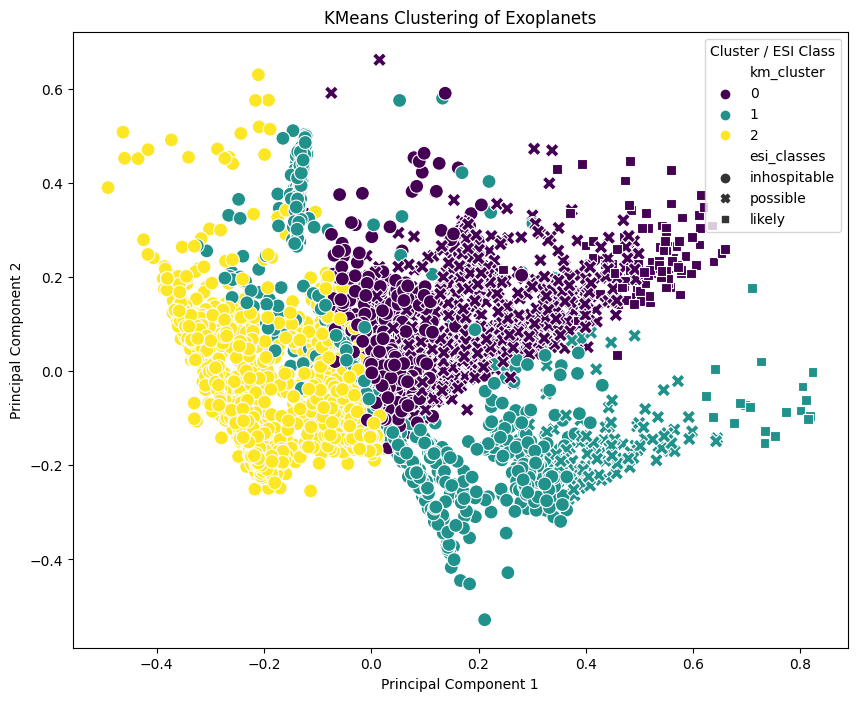

In [ ]:
# Clustering function form sklearn    ref =  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

kmeans = KMeans(init="k-means++", n_clusters=3, n_init = 'auto', algorithm = 'lloyd', random_state=11) # Domain knowledge in the form of input parameters
kmeans_clustering = kmeans.fit(reduced_data)
clustering_df['km_cluster'] = kmeans_clustering.labels_

kmeans_x = kmeans.fit_transform(X_test_c)
kmeans_silhouette = silhouette_score(kmeans_x, y_test_c)
print('Silhoette: ', kmeans_silhouette)
print('Hopkins: ', hopkins(kmeans_x))

# Plotting the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC2', y='PC3', hue='km_cluster', style='esi_classes', data=clustering_df, palette='viridis', s=100)

plt.title('KMeans Clustering of Exoplanets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster / ESI Class', loc='upper right')
plt.grid(False)
plt.show()

### 3.2 Affinity Propagation Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Silhoette:  0.05449893175440969


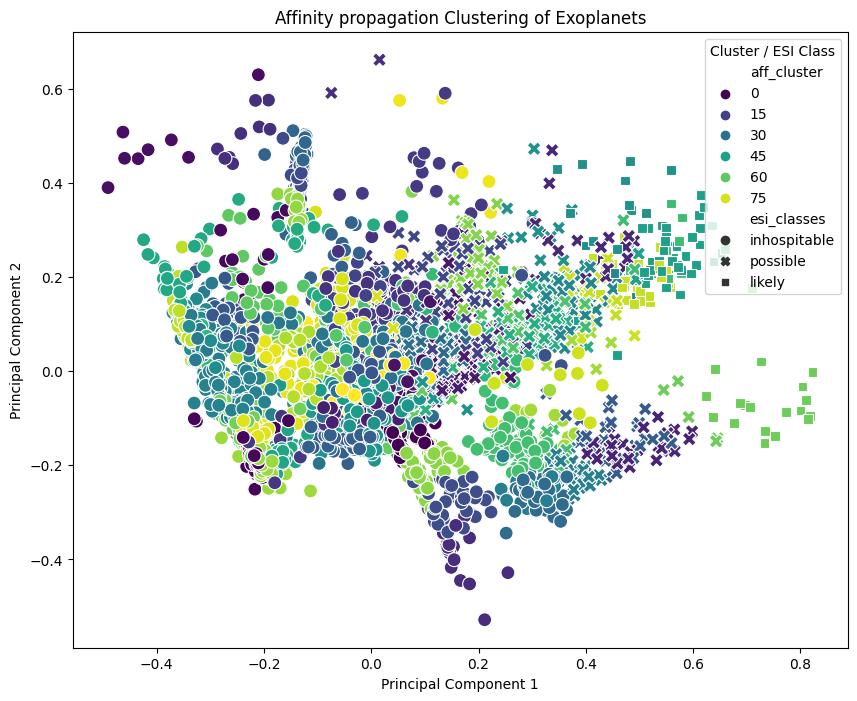

In [ ]:
# Affinity Propagation   ref = https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html#sklearn.cluster.AffinityPropagation

aff_clustering = AffinityPropagation(damping=0.5, convergence_iter=10, affinity='euclidean', max_iter=300, random_state=69)
affinity_prop_clustering = aff_clustering.fit(reduced_data)
clustering_df['aff_cluster'] = affinity_prop_clustering.labels_

aff_x = pd.DataFrame(columns=['index','predict'])
aff_x['index'] = range(1, len(X_test_c) + 1)
aff_x['predict'] = aff_clustering.fit_predict(X_test_c)
aff_silhouette = silhouette_score(aff_x, y_test_c)
print('Silhoette: ', abs(aff_silhouette))

# Plotting the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC2', y='PC3', hue='aff_cluster', style='esi_classes', data=clustering_df, palette='viridis', s=100)

plt.title('Affinity propagation Clustering of Exoplanets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster / ESI Class', loc='upper right')
plt.grid(False)
plt.show()

### 3.3 Mean-Shift Clustering

Silhoette:  0.057037063471094426


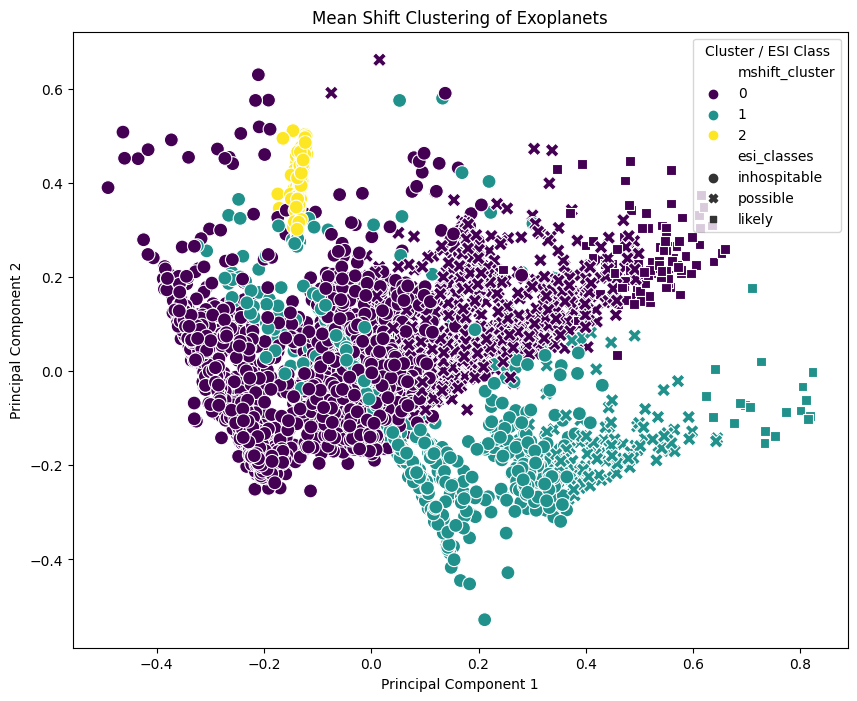

In [ ]:
# Mean Shift  ref = https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift

mshift_clustering = MeanShift()
mean_shift_clustering = mshift_clustering.fit(reduced_data)
clustering_df['mshift_cluster'] = mean_shift_clustering.labels_

mshift_x = pd.DataFrame(columns=['index','predict'])
mshift_x['index'] = range(1, len(X_test_c) + 1)
mshift_x['predict'] = mshift_clustering.fit_predict(X_test_c)
mshift_silhouette = silhouette_score(mshift_x, y_test_c)
print('Silhoette: ', abs(mshift_silhouette))

# Plotting the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC2', y='PC3', hue='mshift_cluster', style='esi_classes', data=clustering_df, palette='viridis', s=100)

plt.title('Mean Shift Clustering of Exoplanets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster / ESI Class', loc='upper right')
plt.grid(False)
plt.show()

### 3.4 SpectralClustering

Silhoette:  0.05701081826398788


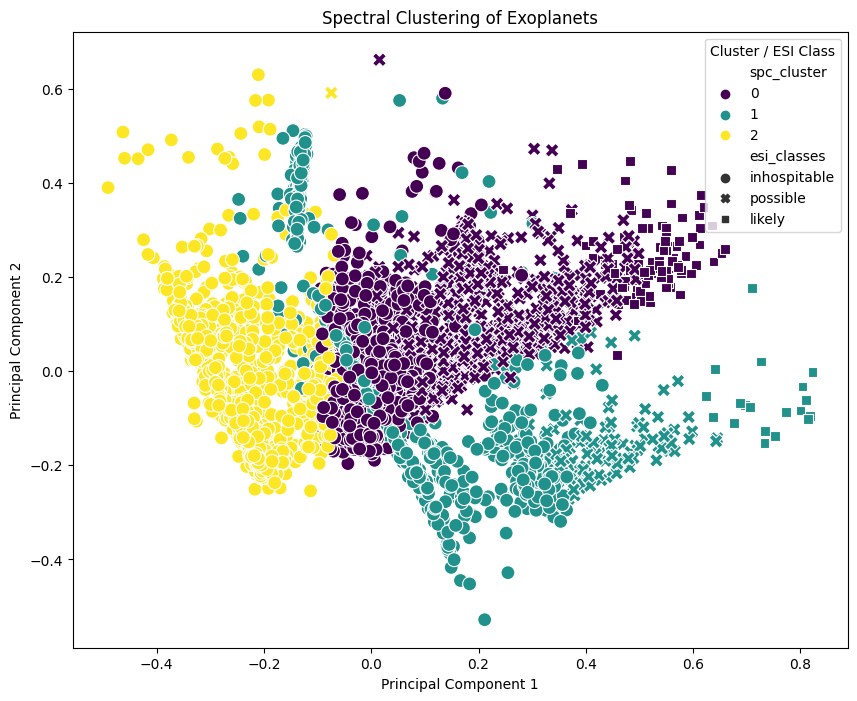

In [ ]:
# SpectralClustering    ref = https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering

spc_clustering = SpectralClustering(n_clusters=3, assign_labels="discretize", random_state=69)
spectral_clustering = spc_clustering.fit(reduced_data)
clustering_df['spc_cluster'] = spectral_clustering.labels_

spc_x = pd.DataFrame(columns=['index','predict'])
spc_x['index'] = range(1, len(X_test_c) + 1)
spc_x['predict'] = spc_clustering.fit_predict(X_test_c)
spc_silhouette = silhouette_score(spc_x, y_test_c)
print('Silhoette: ', abs(spc_silhouette))

# Plotting the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC2', y='PC3', hue='spc_cluster', style='esi_classes', data=clustering_df, palette='viridis', s=100)

plt.title('Spectral Clustering of Exoplanets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster / ESI Class', loc='upper right')
plt.grid(False)
plt.show()

### 3.5 Agglomerative Clustering

Silhoette:  0.05702875511776977


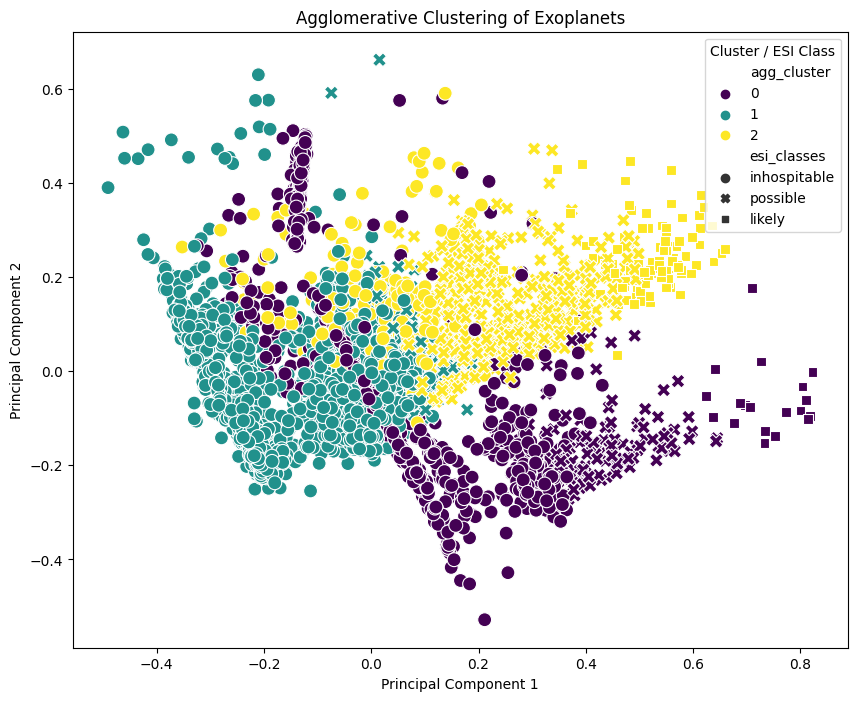

In [ ]:
# Clustering function form sklearn    ref =  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward') # linkage (ward, complete, average, single)
agglomerative_clustering = agg_clustering.fit(reduced_data)
clustering_df['agg_cluster'] = agglomerative_clustering.labels_

agg_x = pd.DataFrame(columns=['index','predict'])
agg_x['index'] = range(1, len(X_test_c) + 1)
agg_x['predict'] = agg_clustering.fit_predict(X_test_c)
agg_silhouette = silhouette_score(agg_x, y_test_c)
print('Silhoette: ', abs(agg_silhouette))

# Plotting the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC2', y='PC3', hue='agg_cluster', style='esi_classes', data=clustering_df, palette='viridis', s=100)

plt.title('Agglomerative Clustering of Exoplanets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster / ESI Class', loc='upper right')
plt.grid(False)
plt.show()

### 3.6 BisectingKMeans Clustering

Silhoette:  0.0809658235767473
Hopkins:  0.9994066663025502


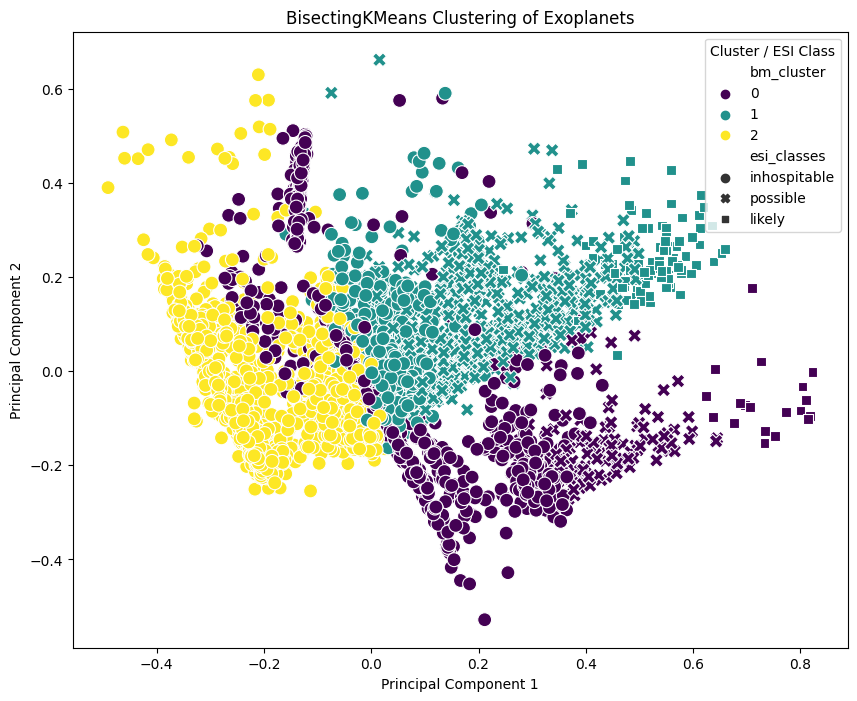

In [ ]:
# BisectingKMeans   ref = https://scikit-learn.org/stable/modules/generated/sklearn.cluster.BisectingKMeans.html#sklearn.cluster.BisectingKMeans

bmeans_clustering = BisectingKMeans(n_clusters=3, init='random', random_state=69, algorithm='elkan', bisecting_strategy='biggest_inertia')
bisecting_kmeans_clustering = bmeans_clustering.fit(reduced_data)
clustering_df['bm_cluster'] = bisecting_kmeans_clustering.labels_

bmeans_x = bmeans_clustering.fit_transform(X_test_c)
bmeans_silhouette = silhouette_score(bmeans_x, y_test_c)
print('Silhoette: ', bmeans_silhouette)
print('Hopkins: ', hopkins(bmeans_x))

# Plotting the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC2', y='PC3', hue='bm_cluster', style='esi_classes', data=clustering_df, palette='viridis', s=100)

plt.title('BisectingKMeans Clustering of Exoplanets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster / ESI Class', loc='upper right')
plt.grid(False)
plt.show()

### 3.7 DBSCAN Clustering

Silhoette:  0.05705064974427843


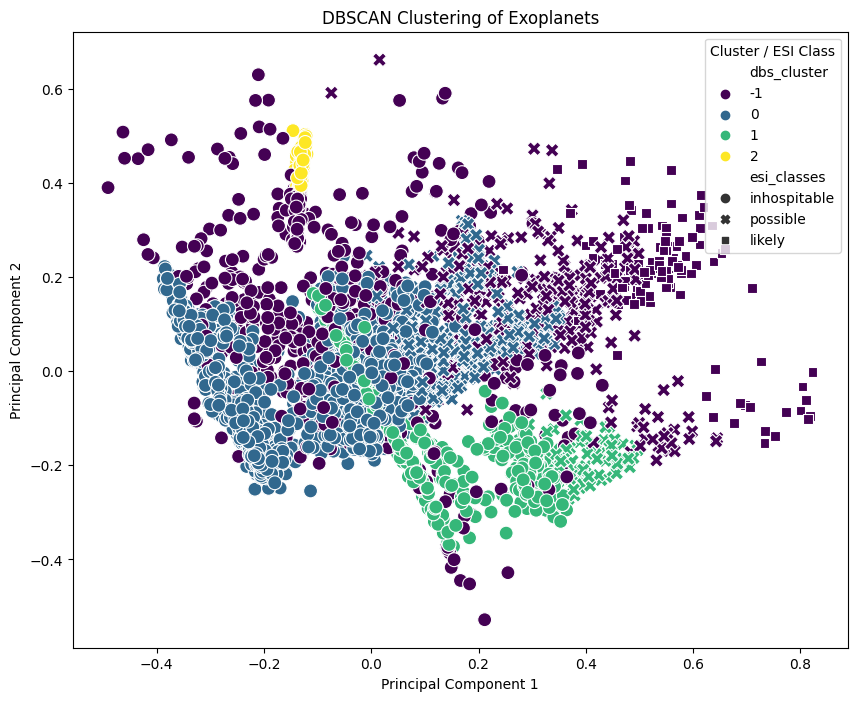

In [ ]:
# DBSCAN    ref = https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

dbs_clustering = DBSCAN(eps=0.1, min_samples=35, metric='euclidean', algorithm='auto', leaf_size=30, n_jobs=-1) # algorithm = (auto, ball_tree, kd_tree, brute)
dbscan_clustering = dbs_clustering.fit(reduced_data)
clustering_df['dbs_cluster'] = dbscan_clustering.labels_

dbs_x = pd.DataFrame(columns=['index','predict'])
dbs_x['index'] = range(1, len(X_test_c) + 1)
dbs_x['predict'] = dbs_clustering.fit_predict(X_test_c)
dbs_silhouette = silhouette_score(dbs_x, y_test_c)
print('Silhoette: ', abs(dbs_silhouette))

# Plotting the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC2', y='PC3', hue='dbs_cluster', style='esi_classes', data=clustering_df, palette='viridis', s=100)

plt.title('DBSCAN Clustering of Exoplanets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster / ESI Class', loc='upper right')
plt.grid(False)
plt.show()

### 3.8 OPTICS Clustering

Silhoette:  0.057021525662228276


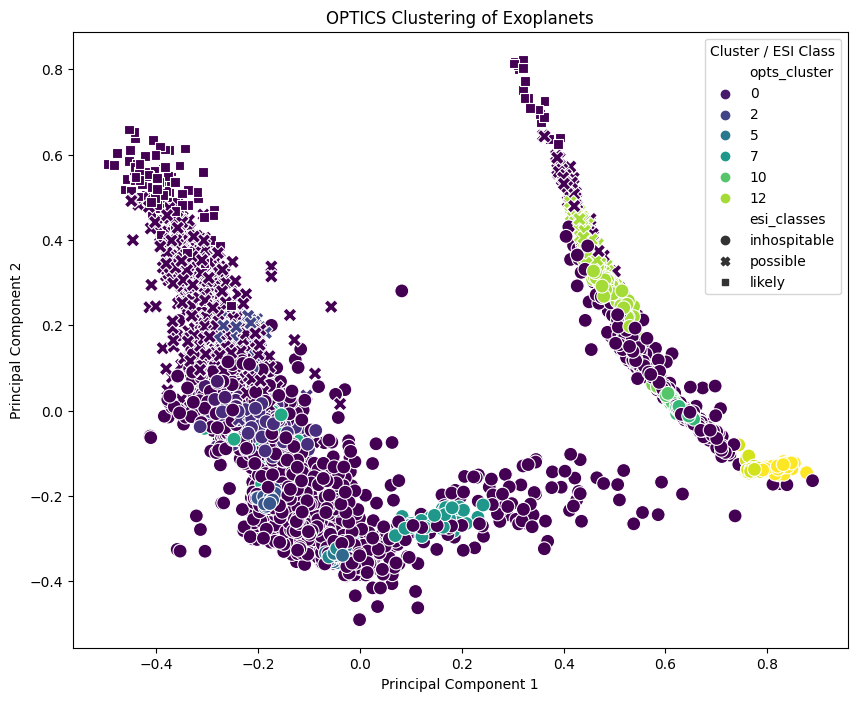

In [ ]:
# OPTICS     ref = https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html#sklearn.cluster.OPTICS

optics_clustering = OPTICS(min_samples=25, metric='minkowski', xi=0.001, algorithm='auto', leaf_size=30, n_jobs=-1)
opts_clustering = optics_clustering.fit(reduced_data)
clustering_df['opts_cluster'] = opts_clustering.labels_

optics_x = pd.DataFrame(columns=['index','predict'])
optics_x['index'] = range(1, len(X_test_c) + 1)
optics_x['predict'] = optics_clustering.fit_predict(X_test_c)
optics_silhouette = silhouette_score(optics_x, y_test_c)
print('Silhoette: ', abs(optics_silhouette))

# Plotting the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='opts_cluster', style='esi_classes', data=clustering_df, palette='viridis', s=100)

plt.title('OPTICS Clustering of Exoplanets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster / ESI Class', loc='upper right')
plt.grid(False)
plt.show()

### 3.9 BIRCH Clustering

Silhoette:  0.07367502332855141
Hopkins:  nan


<ipython-input-75-12f6c525295e>:24: RuntimeWarning: overflow encountered in power
  U = (u_dist**d).sum()
<ipython-input-75-12f6c525295e>:26: RuntimeWarning: invalid value encountered in double_scalars
  H = U / (U + W)


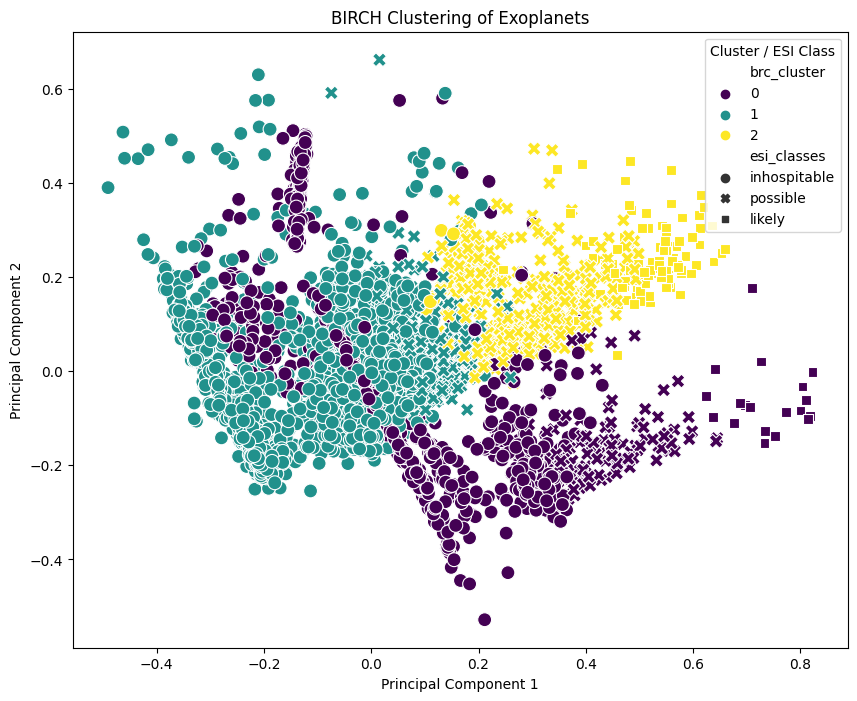

In [ ]:
# BIRCH     ref = https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html#sklearn.cluster.Birch

birch_clustering = Birch(threshold=0.05, branching_factor=50, n_clusters=3, compute_labels=True)
brc_clustering = birch_clustering.fit(reduced_data)
clustering_df['brc_cluster'] = brc_clustering.labels_

birch_x = birch_clustering.fit_transform(X_test_c)
birch_silhouette = silhouette_score(birch_x, y_test_c)
print('Silhoette: ', birch_silhouette)
print('Hopkins: ', hopkins(birch_x))

# Plotting the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC2', y='PC3', hue='brc_cluster', style='esi_classes', data=clustering_df, palette='viridis', s=100)

plt.title('BIRCH Clustering of Exoplanets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster / ESI Class', loc='upper right')
plt.grid(False)
plt.show()

### 3.10 Gaussian Mixture Clustering

Silhoette:  0.05701218113009754


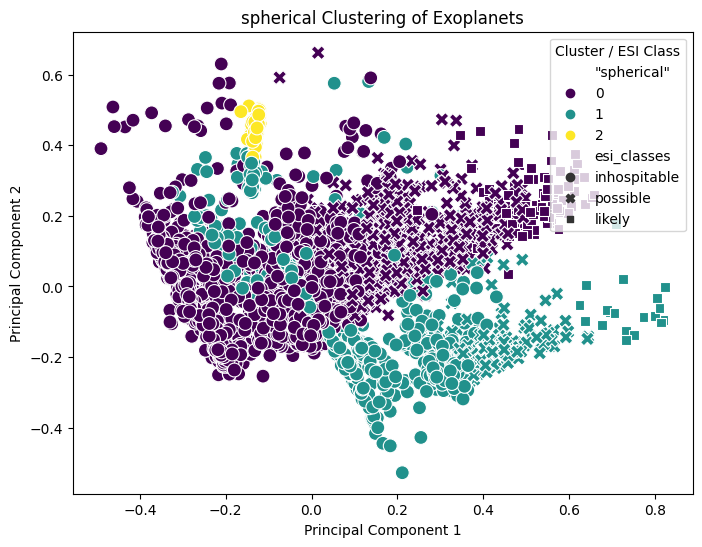

Silhoette:  0.05701344613019673


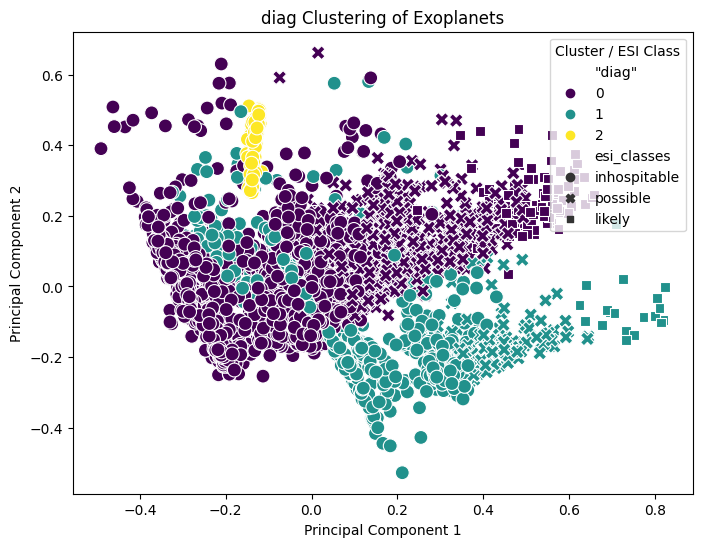

Silhoette:  0.05701081998398771


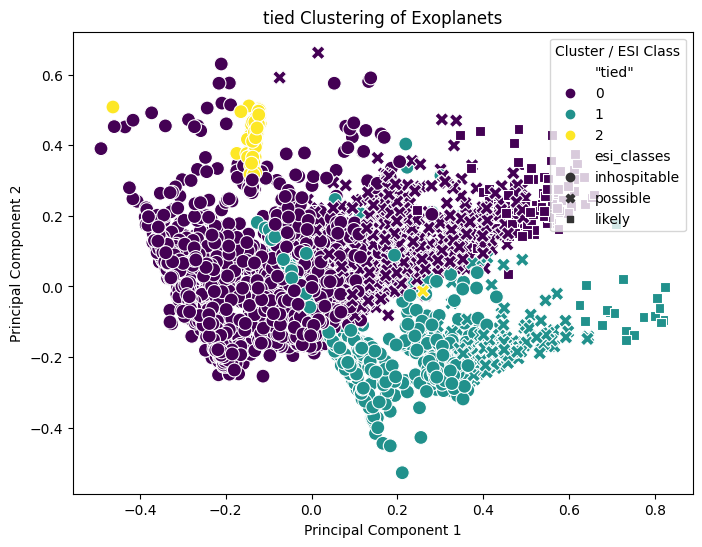

Silhoette:  0.05704430619928801


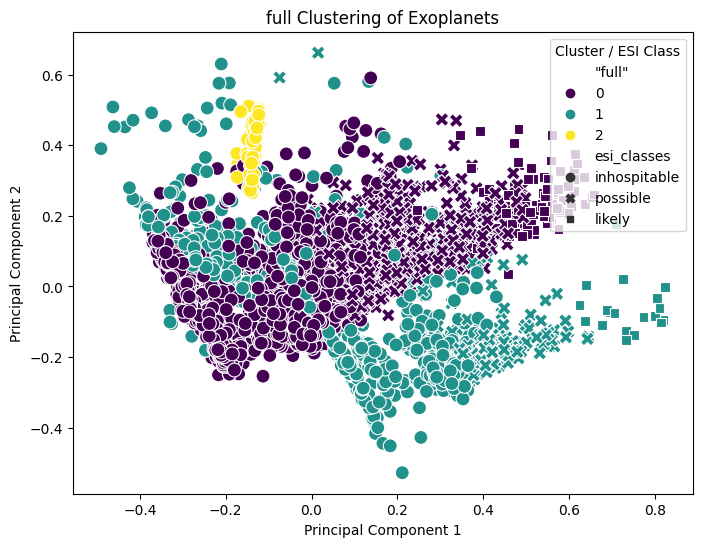

In [ ]:
# GMM     ref = https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
estimators = ["spherical", "diag", "tied", "full"]

for estimator in estimators:
  gmm_clustering = GaussianMixture(n_components=3, covariance_type=estimator, max_iter=200, random_state=69, init_params = 'k-means++')  # init_params= (kmeans, k-means++, random, random_from_data)
  gaussian_mixture_matrix_clustering = gmm_clustering.fit_predict(reduced_data)
  clustering_df['"'+estimator+'"'] = gaussian_mixture_matrix_clustering

  gmm_x = pd.DataFrame(columns=['index','predict'])
  gmm_x['index'] = range(1, len(X_test_c) + 1)
  gmm_x['predict'] = gmm_clustering.fit_predict(X_test_c)
  gmm_silhouette = silhouette_score(gmm_x, y_test_c)
  print('Silhoette: ', abs(gmm_silhouette))

  # Plotting the results
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x='PC2', y='PC3', hue='"'+estimator+'"', style='esi_classes', data=clustering_df, palette='viridis', s=100)

  plt.title(estimator +' Clustering of Exoplanets')
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.legend(title='Cluster / ESI Class', loc='upper right')
  plt.grid(False)
  plt.show()
